# I. Introduction

Road safety remains a critical concern for urban planners and policymakers, particularly as cities expand and traffic volumes grow. This report presents a comparative analysis of serious road accidents in Victoria, focusing on Geelong and Melbourne. 

Despite having fewer total crashes, Geelong consistently shows a higher rate of serious accidents. Through data exploration and predictive modeling, we uncover the key factors—such as vehicle characteristics, speed zones, and driving behavior—that contribute to this disparity, offering insights to guide targeted safety interventions.

# II. Requirement

In [178]:
# Importing "pandas" library for reading the dataset and working with it.
import pandas as pd 

import seaborn as sns # For advanced data visualization
import matplotlib.pyplot as plt
from datetime import time # For handling time-based operations
import numpy as np # For numerical computations
sns.set_theme(style="whitegrid", palette=[ "#023E8A" ]) # Blue tone for consistency and readability

# import folium
# from folium.plugins import HeatMap

The dataset can be found at: https://opendata.transport.vic.gov.au/dataset/victoria-road-crash-data

The dataframes used in this project include: ***acciddent, vehicle, person, and node***

In [179]:
accidents_df = pd.read_csv("accident.csv")
vehicles_df = pd.read_csv("vehicle.csv")
person_df = pd.read_csv("person.csv")
node_df = pd.read_csv("node.csv")

# III. Data Exploration

This section will explore each dataset individually. But first, let's have a look at the 5 dataset and determine which features are important to keep for the analysis: 

In [180]:
accidents_df.columns

Index(['ACCIDENT_NO', 'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ACCIDENT_TYPE',
       'ACCIDENT_TYPE_DESC', 'DAY_OF_WEEK', 'DAY_WEEK_DESC', 'DCA_CODE',
       'DCA_DESC', 'LIGHT_CONDITION', 'NODE_ID', 'NO_OF_VEHICLES',
       'NO_PERSONS_KILLED', 'NO_PERSONS_INJ_2', 'NO_PERSONS_INJ_3',
       'NO_PERSONS_NOT_INJ', 'NO_PERSONS', 'POLICE_ATTEND', 'ROAD_GEOMETRY',
       'ROAD_GEOMETRY_DESC', 'SEVERITY', 'SPEED_ZONE', 'RMA'],
      dtype='object')

In [181]:
vehicles_df.columns

Index(['ACCIDENT_NO', 'VEHICLE_ID', 'VEHICLE_YEAR_MANUF', 'VEHICLE_DCA_CODE',
       'INITIAL_DIRECTION', 'ROAD_SURFACE_TYPE', 'ROAD_SURFACE_TYPE_DESC',
       'REG_STATE', 'VEHICLE_BODY_STYLE', 'VEHICLE_MAKE', 'VEHICLE_MODEL',
       'VEHICLE_POWER', 'VEHICLE_TYPE', 'VEHICLE_TYPE_DESC', 'VEHICLE_WEIGHT',
       'CONSTRUCTION_TYPE', 'FUEL_TYPE', 'NO_OF_WHEELS', 'NO_OF_CYLINDERS',
       'SEATING_CAPACITY', 'TARE_WEIGHT', 'TOTAL_NO_OCCUPANTS',
       'CARRY_CAPACITY', 'CUBIC_CAPACITY', 'FINAL_DIRECTION', 'DRIVER_INTENT',
       'VEHICLE_MOVEMENT', 'TRAILER_TYPE', 'VEHICLE_COLOUR_1',
       'VEHICLE_COLOUR_2', 'CAUGHT_FIRE', 'INITIAL_IMPACT', 'LAMPS',
       'LEVEL_OF_DAMAGE', 'TOWED_AWAY_FLAG', 'TRAFFIC_CONTROL',
       'TRAFFIC_CONTROL_DESC'],
      dtype='object')

In [182]:
person_df.columns

Index(['ACCIDENT_NO', 'PERSON_ID', 'VEHICLE_ID', 'SEX', 'AGE_GROUP',
       'INJ_LEVEL', 'INJ_LEVEL_DESC', 'SEATING_POSITION', 'HELMET_BELT_WORN',
       'ROAD_USER_TYPE', 'ROAD_USER_TYPE_DESC', 'LICENCE_STATE',
       'TAKEN_HOSPITAL', 'EJECTED_CODE'],
      dtype='object')

In [183]:
node_df.columns

Index(['_id', 'ACCIDENT_NO', 'NODE_ID', 'NODE_TYPE', 'AMG_X', 'AMG_Y',
       'LGA_NAME', 'LGA NAME ALL', 'DEG_URBAN_NAME', 'LATITUDE', 'LONGITUDE',
       'POSTCODE_CRASH'],
      dtype='object')

We will exclude the columns (features) that are not important for this analysis:

In [184]:
accidents = accidents_df[[
'ACCIDENT_NO', 'ACCIDENT_DATE', 
'ACCIDENT_TIME', #'ACCIDENT_TYPE',
'ACCIDENT_TYPE_DESC', #'DAY_OF_WEEK', 
'DAY_WEEK_DESC', #'DCA_CODE', 'DCA_DESC', 
'LIGHT_CONDITION', #'NODE_ID', 
'NO_OF_VEHICLES',
'NO_PERSONS_KILLED', 'NO_PERSONS_INJ_2', 'NO_PERSONS_INJ_3',
'NO_PERSONS_NOT_INJ', 'NO_PERSONS', #'POLICE_ATTEND', #'ROAD_GEOMETRY',
'ROAD_GEOMETRY_DESC', 'SEVERITY', 'SPEED_ZONE', 'RMA'
]]

vehicles = vehicles_df[[
'ACCIDENT_NO', 'VEHICLE_ID', 'VEHICLE_YEAR_MANUF', #'VEHICLE_DCA_CODE',
#'INITIAL_DIRECTION', 'ROAD_SURFACE_TYPE', 
'ROAD_SURFACE_TYPE_DESC', #'REG_STATE', 'VEHICLE_BODY_STYLE', 
'VEHICLE_MAKE', #'VEHICLE_MODEL',
'VEHICLE_POWER', #'VEHICLE_TYPE', 
'VEHICLE_TYPE_DESC', 'VEHICLE_WEIGHT',#'CONSTRUCTION_TYPE', 'FUEL_TYPE', 'NO_OF_WHEELS', 'NO_OF_CYLINDERS', 'SEATING_CAPACITY', 
'TARE_WEIGHT', 'TOTAL_NO_OCCUPANTS',
'CARRY_CAPACITY', 'CUBIC_CAPACITY', #'FINAL_DIRECTION', 
#'DRIVER_INTENT', 'VEHICLE_MOVEMENT', #'TRAILER_TYPE', 'VEHICLE_COLOUR_1',
#'VEHICLE_COLOUR_2', 'CAUGHT_FIRE', 'INITIAL_IMPACT', 
'LAMPS', 'LEVEL_OF_DAMAGE', #'TOWED_AWAY_FLAG', 'TRAFFIC_CONTROL',
'TRAFFIC_CONTROL_DESC'
]]

person = person_df[[
'ACCIDENT_NO', 'PERSON_ID', 'VEHICLE_ID', 
'SEX', 'AGE_GROUP', #'INJ_LEVEL', 'INJ_LEVEL_DESC', 
'SEATING_POSITION', 'HELMET_BELT_WORN', #'ROAD_USER_TYPE', 
'ROAD_USER_TYPE_DESC', #'LICENCE_STATE',
'TAKEN_HOSPITAL'#, 'EJECTED_CODE'
]]

node = node_df[[
#'_id', 
'ACCIDENT_NO', #'NODE_ID', 'NODE_TYPE', 
#'AMG_X', 'AMG_Y', 
'LGA_NAME', #'LGA NAME ALL', 
'DEG_URBAN_NAME', 'LATITUDE', 'LONGITUDE', 'POSTCODE_CRASH'
]]

### 1. Accident dataset

Since this report only focuses on serious (or severe) accidents, where the SEVERITY score is either 1 or 2 (a person is killed or a person gets serious injuries). We will filter the dataset out to reduce the size of it:

In [185]:
serious_accidents = accidents[((accidents['SEVERITY'] == 1) | (accidents['SEVERITY'] == 2))] # Filter the dataset to keep serious accidents only

 Let's look at the first few rows of the dataset:

In [186]:
serious_accidents.head()

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE_DESC,DAY_WEEK_DESC,LIGHT_CONDITION,NO_OF_VEHICLES,NO_PERSONS_KILLED,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_NOT_INJ,NO_PERSONS,ROAD_GEOMETRY_DESC,SEVERITY,SPEED_ZONE,RMA
1,T20120000012,2012-01-01,02:00:00,Collision with vehicle,Sunday,3,2,0,1,0,2,3,Cross intersection,2,80,NaN
2,T20120000013,2012-01-01,03:35:00,Collision with vehicle,Sunday,3,2,0,1,0,0,1,T intersection,2,60,Arterial Other
5,T20120000028,2012-01-01,04:00:00,Collision with a fixed object,Sunday,5,1,0,1,0,0,1,T intersection,2,100,NaN
7,T20120000043,2012-01-01,00:45:00,Collision with vehicle,Sunday,5,2,0,2,0,1,3,T intersection,2,80,Arterial Highway
8,T20120000044,2012-01-01,16:25:00,Collision with vehicle,Sunday,1,2,0,1,0,1,2,T intersection,2,60,Arterial Other


Let's have a look at the dataset information:

In [187]:
serious_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67638 entries, 1 to 179873
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ACCIDENT_NO         67638 non-null  object
 1   ACCIDENT_DATE       67638 non-null  object
 2   ACCIDENT_TIME       67638 non-null  object
 3   ACCIDENT_TYPE_DESC  67638 non-null  object
 4   DAY_WEEK_DESC       67638 non-null  object
 5   LIGHT_CONDITION     67638 non-null  int64 
 6   NO_OF_VEHICLES      67638 non-null  int64 
 7   NO_PERSONS_KILLED   67638 non-null  int64 
 8   NO_PERSONS_INJ_2    67638 non-null  int64 
 9   NO_PERSONS_INJ_3    67638 non-null  int64 
 10  NO_PERSONS_NOT_INJ  67638 non-null  int64 
 11  NO_PERSONS          67638 non-null  int64 
 12  ROAD_GEOMETRY_DESC  67638 non-null  object
 13  SEVERITY            67638 non-null  int64 
 14  SPEED_ZONE          67638 non-null  int64 
 15  RMA                 63944 non-null  object
dtypes: int64(9), object(7)
mem

An initial inspection reveals that the RMA column contains missing values since the number of **non-null** values doesn't match the number of entries. 

Additionally, the columns **SEVERITY, LIGHT_CONDITION, and SPEED_ZONE** are currently stored as integers. However, these variables represent categorical concepts (e.g., severity levels, lighting conditions, and speed zones) rather than numerical quantities. According to the data dictionary, it is more appropriate to treat them as categorical variables. Therefore, I will convert their data types to object to ensure proper interpretation and analysis.

In [ ]:
# Convert SEVERITY, LIGHT_CONDITION, and SPEED_ZONE to Object data types
serious_accidents["SEVERITY"] = serious_accidents["SEVERITY"].astype(object) 
serious_accidents["LIGHT_CONDITION"] = serious_accidents["LIGHT_CONDITION"].astype(object)
serious_accidents["SPEED_ZONE"] = serious_accidents["SPEED_ZONE"].astype(object)

In [189]:
# See the missing values in the dataset by percentage
(serious_accidents.isnull().sum() / len(serious_accidents)) * 100

ACCIDENT_NO           0.000000
ACCIDENT_DATE         0.000000
ACCIDENT_TIME         0.000000
ACCIDENT_TYPE_DESC    0.000000
DAY_WEEK_DESC         0.000000
LIGHT_CONDITION       0.000000
NO_OF_VEHICLES        0.000000
NO_PERSONS_KILLED     0.000000
NO_PERSONS_INJ_2      0.000000
NO_PERSONS_INJ_3      0.000000
NO_PERSONS_NOT_INJ    0.000000
NO_PERSONS            0.000000
ROAD_GEOMETRY_DESC    0.000000
SEVERITY              0.000000
SPEED_ZONE            0.000000
RMA                   5.461427
dtype: float64

In [190]:
serious_accidents.duplicated().sum() # Check for duplication

np.int64(0)

The dataframe has no duplicates and few missing values in RMA (Road Management Authorities) column.

Now, we create 2 variable called **categorical** and **numerical** to make it easier for inspecting the columns given their different characteristics.

In [191]:
accidents_categorical = [] # List of categorical variables
accidents_numerical = [] # List of numerical variables

for i in serious_accidents:
    if serious_accidents[i].dtype == 'O':
        accidents_categorical.append(i)

for i in serious_accidents:
    if i not in accidents_categorical:
        accidents_numerical.append(i)

print(accidents_categorical)
print(accidents_numerical)

['ACCIDENT_NO', 'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ACCIDENT_TYPE_DESC', 'DAY_WEEK_DESC', 'LIGHT_CONDITION', 'ROAD_GEOMETRY_DESC', 'SEVERITY', 'SPEED_ZONE', 'RMA']
['NO_OF_VEHICLES', 'NO_PERSONS_KILLED', 'NO_PERSONS_INJ_2', 'NO_PERSONS_INJ_3', 'NO_PERSONS_NOT_INJ', 'NO_PERSONS']


Let's see some descriptive statistics about categorical variables:

In [192]:
serious_accidents[accidents_categorical].describe()

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE_DESC,DAY_WEEK_DESC,LIGHT_CONDITION,ROAD_GEOMETRY_DESC,SEVERITY,SPEED_ZONE,RMA
count,67638,67638,67638,67638,67638,67638,67638,67638,67638,63944
unique,67638,4596,1434,9,7,7,9,2,13,5
top,T20240019365,2019-08-31,16:00:00,Collision with vehicle,Friday,1,Not at intersection,2,60,Arterial Other
freq,1,35,746,38209,10471,44352,37651,64668,20829,24294


From the table, we can see the most frequent values of each variable and its frequency in the dataset. For example, most accidents happened at around 4 p.m, on Friday, and at the 60 km/h speed zone areas.

Let's do the same for numerical columns:

In [193]:
serious_accidents[accidents_numerical].describe()

,NO_OF_VEHICLES,NO_PERSONS_KILLED,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_NOT_INJ,NO_PERSONS
count,67638.000000,67638.000000,67638.000000,67638.000000,67638.000000,67638.000000
mean,1.742674,0.047281,1.110737,0.283273,0.901002,2.342293
std,0.796653,0.231627,0.515998,0.740784,1.352323,1.699880
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,2.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,2.000000,0.000000,1.000000,0.000000,1.000000,3.000000
max,19.000000,5.000000,16.000000,43.000000,94.000000,97.000000


Let's inpsect the distribution of numerical variables using box plots: 

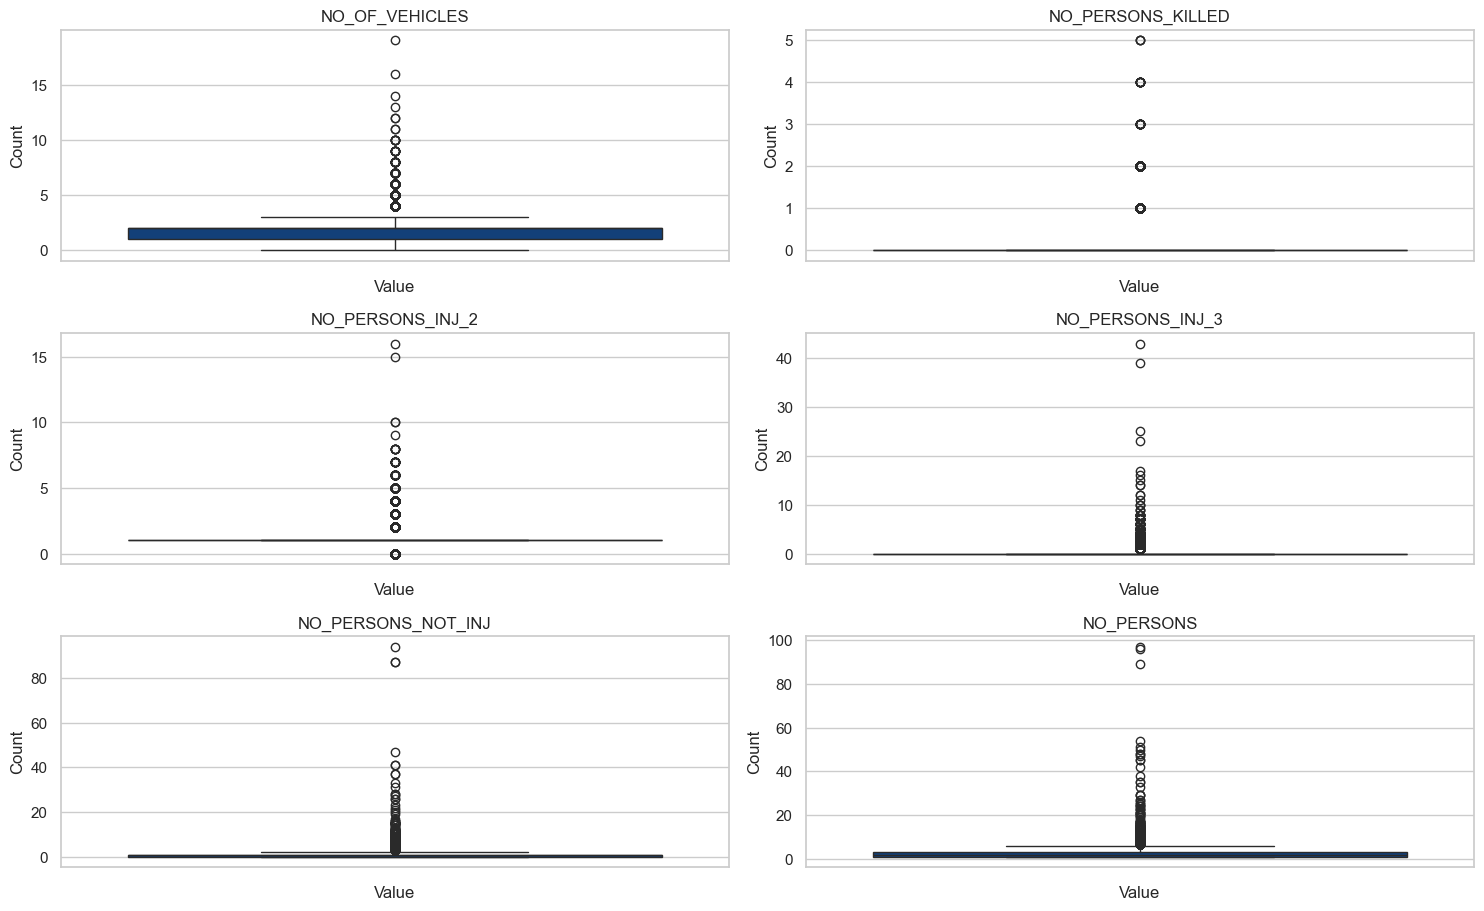

In [194]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))  # adjust rows/cols as needed
axes = axes.flatten()  # flatten to 1D array for easy looping

# Plot each column as bar chart
for i, col in enumerate(accidents_numerical):
    sns.boxplot(data=serious_accidents[accidents_numerical], y=col, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Count")

# Hide any unused axes if columns < subplot cells
for j in range(len(accidents_numerical), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The plots show that most of the time, the number of people killed is 0. Other variables stay at the lowest.

To have an easier inspection of the dataset, let's see how the variables distribute in column charts:

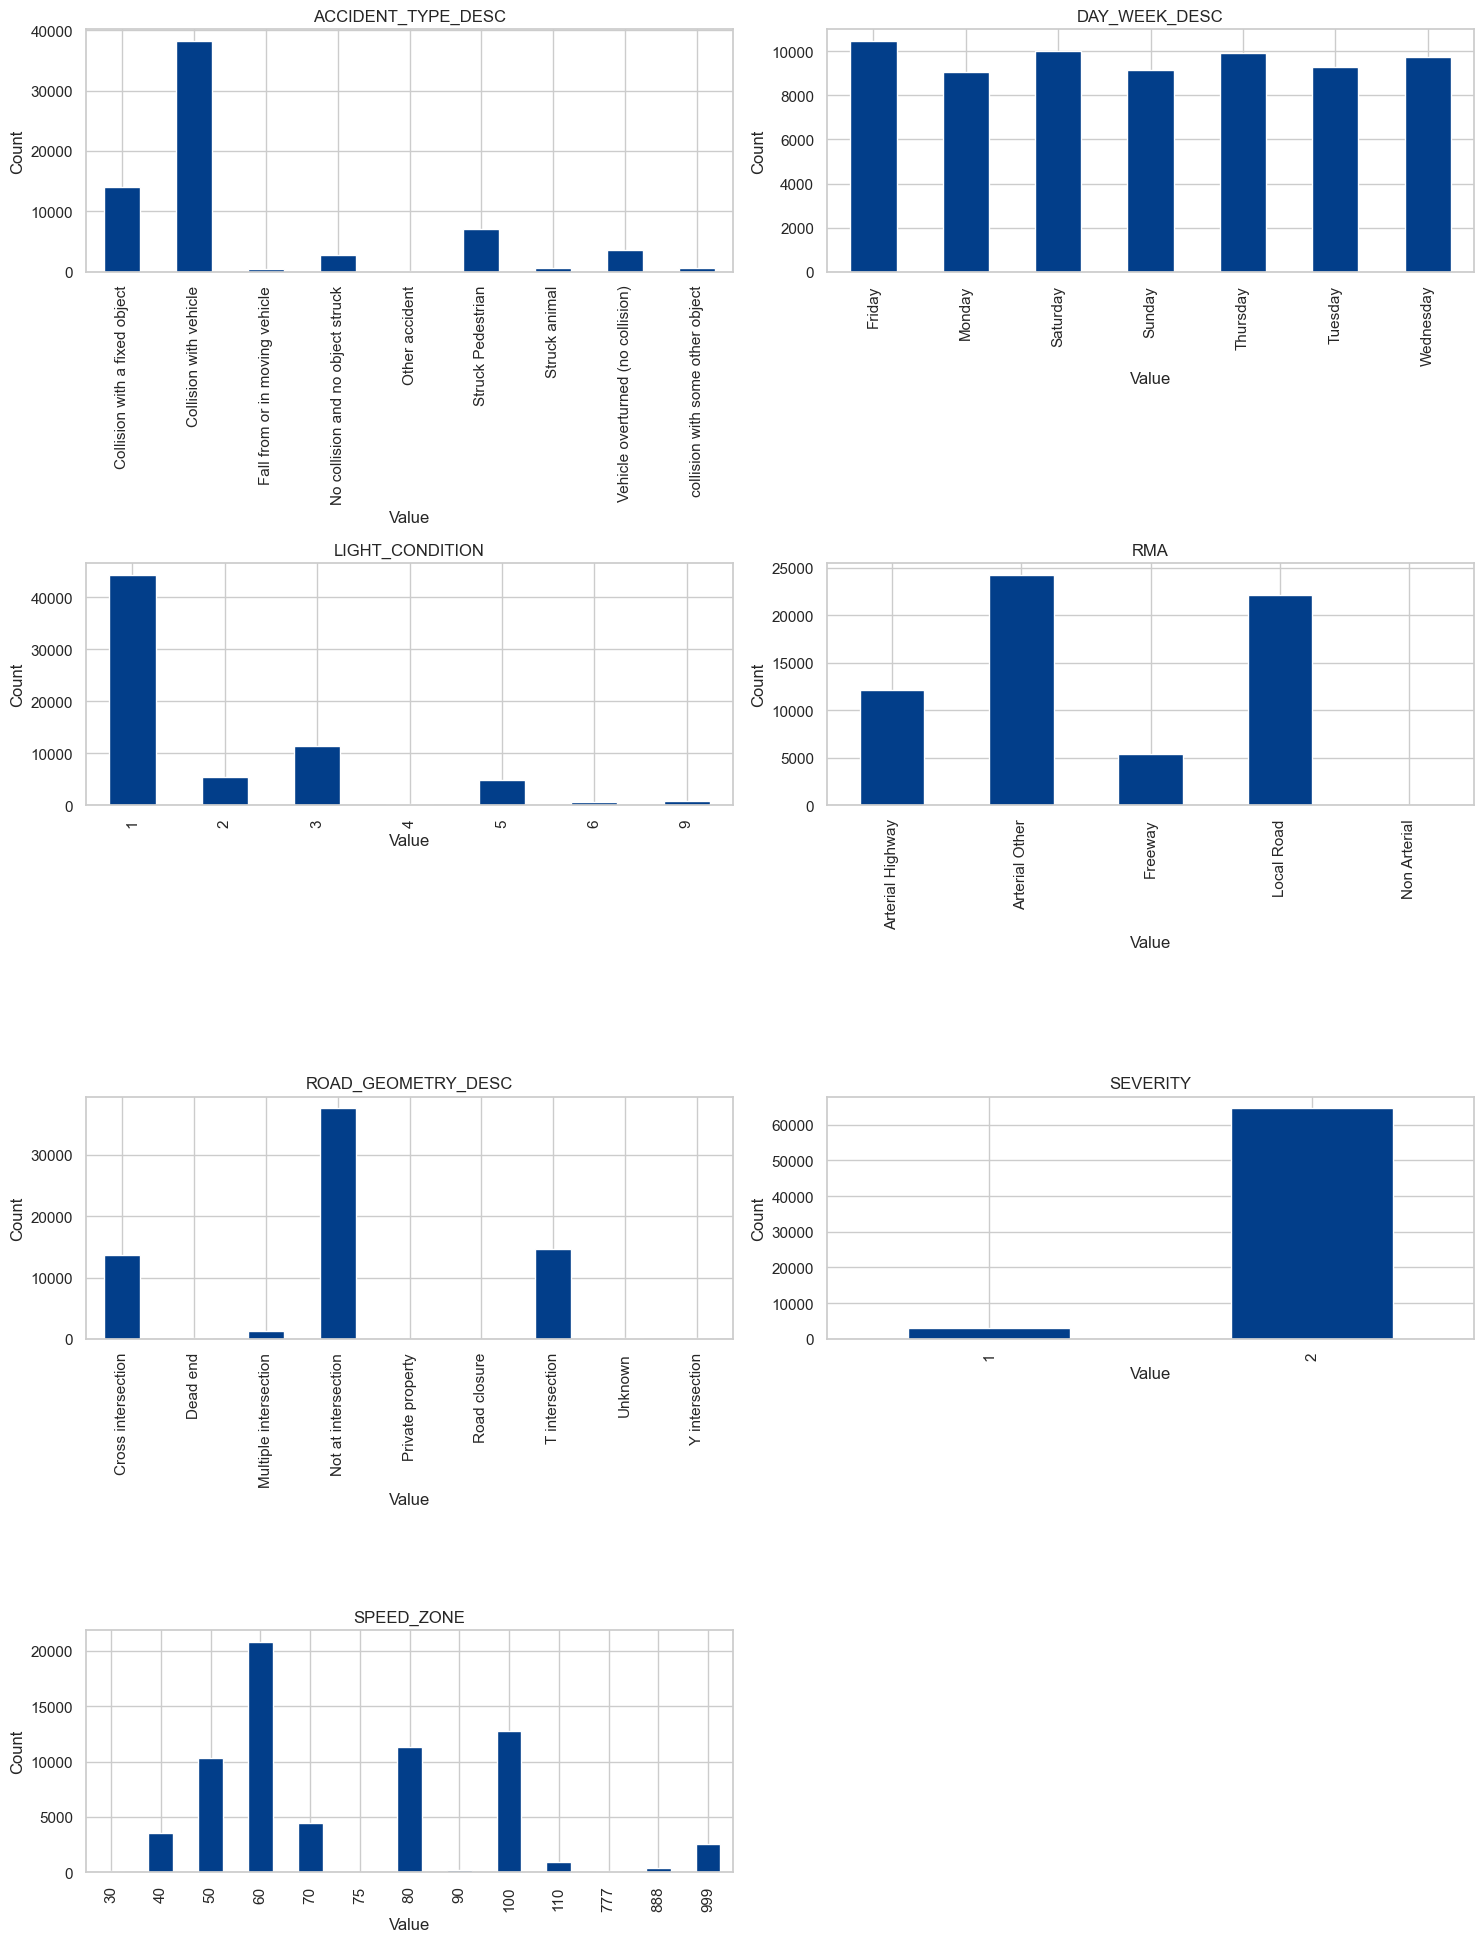

In [195]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 35))  # adjust rows/cols as needed
axes = axes.flatten()  # flatten to 1D array for easy looping

columns = ['ACCIDENT_TYPE_DESC',
       'DAY_WEEK_DESC', 'LIGHT_CONDITION', 'RMA',
       'ROAD_GEOMETRY_DESC', 'SEVERITY', 'SPEED_ZONE'] # A list of variables to be plotted

# Plot each column as bar chart
for i, col in enumerate(columns):
    serious_accidents[col].value_counts().sort_index().plot.bar(ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Count")

# Hide any unused axes if columns < subplot cells
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Key insights from the above charts:

- The majority of serious accidents involved vehicle-to-vehicle collisions, accounting for nearly 40,000 cases.
- Most of these incidents occurred during daylight conditions (LIGHT_CONDITION = 1), with over 40,000 cases recorded.
- In terms of road characteristics, serious accidents were more frequent on Arterial Other roads, non-intersection locations, and areas with a 60 km/h speed zone.
- Note that 777, 888, and 999 in SPEED_ZONE stand for other speed limit, camping grounds, and not known categories, respectively.


Now, we plot the correlation matrix to see how the variables relate to each other:

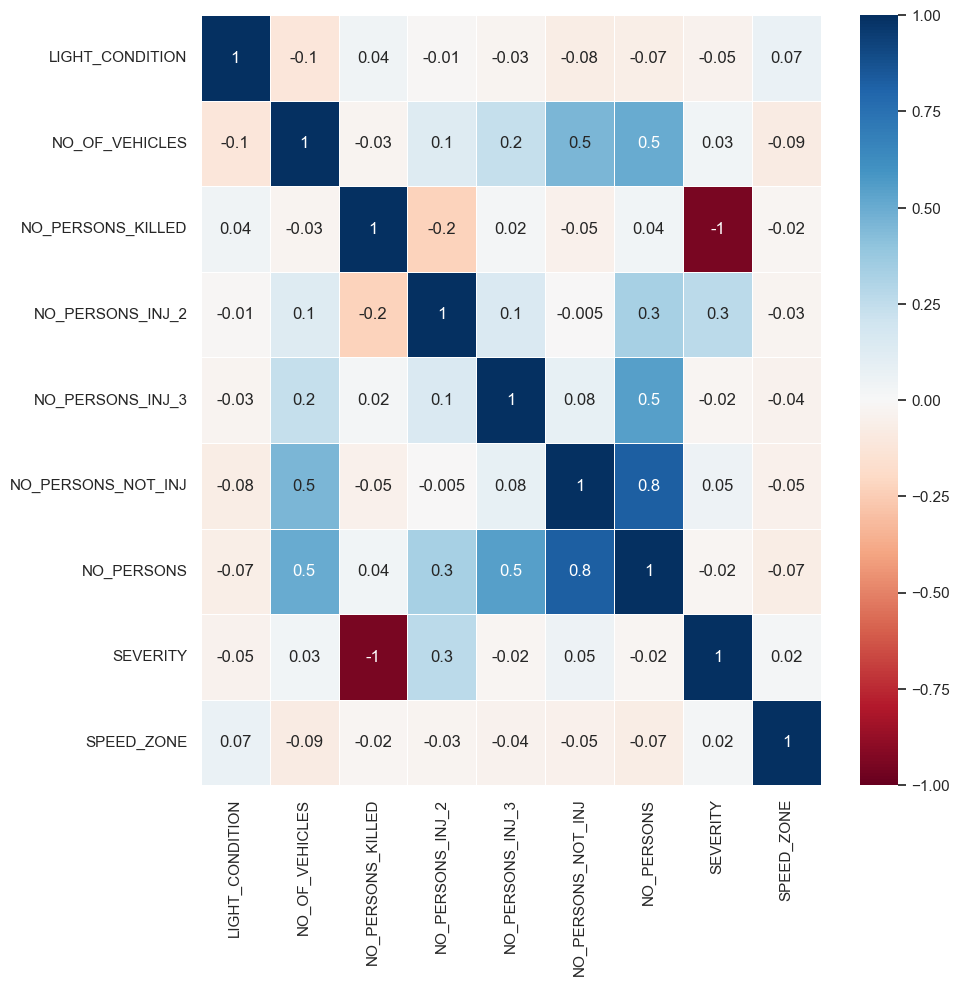

In [196]:
numerical_col = ['LIGHT_CONDITION', 'NO_OF_VEHICLES',
       'NO_PERSONS_KILLED', 'NO_PERSONS_INJ_2', 'NO_PERSONS_INJ_3',
       'NO_PERSONS_NOT_INJ', 'NO_PERSONS', 'SEVERITY', 'SPEED_ZONE']
fig, ax = plt.subplots(figsize=(10,10))
cm = sns.heatmap(serious_accidents[numerical_col].corr(), linewidths = .5, cmap="RdBu", annot=True, fmt='.1g', vmin=-1, vmax=1)

As can be seen from the matrix, there are strong correlation between **NO_PERSONS** and **NO_PERSONS_NOT_INJ**. This indicates that most people were not injured in huge accidents where involved lots of people.

### 2. Vehicle Dataset

Now, before inspecting the **vehicle** dataset, let's filter it out to keep severe accidents only:

In [197]:
filtered_vehicles = vehicles[vehicles['ACCIDENT_NO'].isin(serious_accidents['ACCIDENT_NO'])] # Keep accidents where their IDs match with the serious_accidents dataframe

In [198]:
filtered_vehicles.head()

,ACCIDENT_NO,VEHICLE_ID,VEHICLE_YEAR_MANUF,ROAD_SURFACE_TYPE_DESC,VEHICLE_MAKE,VEHICLE_POWER,VEHICLE_TYPE_DESC,VEHICLE_WEIGHT,TARE_WEIGHT,TOTAL_NO_OCCUPANTS,CARRY_CAPACITY,CUBIC_CAPACITY,LAMPS,LEVEL_OF_DAMAGE,TRAFFIC_CONTROL_DESC
1,T20120000012,A,2002.0,Paved,HOLDEN,NaN,Car,NaN,1600.0,2.0,NaN,NaN,1.0,2,Stop-go lights
2,T20120000012,B,1988.0,Paved,TOYOTA,NaN,Car,1450.0,1150.0,1.0,300.0,NaN,9.0,4,Stop-go lights
3,T20120000013,A,1997.0,Paved,MITSUB,NaN,Car,NaN,1300.0,1.0,NaN,NaN,1.0,4,No control
4,T20120000013,B,2010.0,Paved,TOYOTA,NaN,Station Wagon,NaN,2250.0,0.0,NaN,NaN,2.0,4,No control
7,T20120000028,A,1996.0,Paved,L ROV,NaN,Station Wagon,NaN,2040.0,1.0,NaN,NaN,2.0,5,No control


Doing the same procedure for the **serious_accidents** dataset, we will first inspect the info of the data:

In [199]:
filtered_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117871 entries, 1 to 328009
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ACCIDENT_NO             117871 non-null  object 
 1   VEHICLE_ID              117871 non-null  object 
 2   VEHICLE_YEAR_MANUF      115827 non-null  float64
 3   ROAD_SURFACE_TYPE_DESC  117871 non-null  object 
 4   VEHICLE_MAKE            111819 non-null  object 
 5   VEHICLE_POWER           0 non-null       float64
 6   VEHICLE_TYPE_DESC       117871 non-null  object 
 7   VEHICLE_WEIGHT          15254 non-null   float64
 8   TARE_WEIGHT             113616 non-null  float64
 9   TOTAL_NO_OCCUPANTS      117863 non-null  float64
 10  CARRY_CAPACITY          15197 non-null   float64
 11  CUBIC_CAPACITY          18887 non-null   float64
 12  LAMPS                   117871 non-null  float64
 13  LEVEL_OF_DAMAGE         117871 non-null  int64  
 14  TRAFFIC_CONTROL_DESC    1

The dataset seems to contain lots of missing values. Let's plot them out in percentage numbers for easy inpsection:

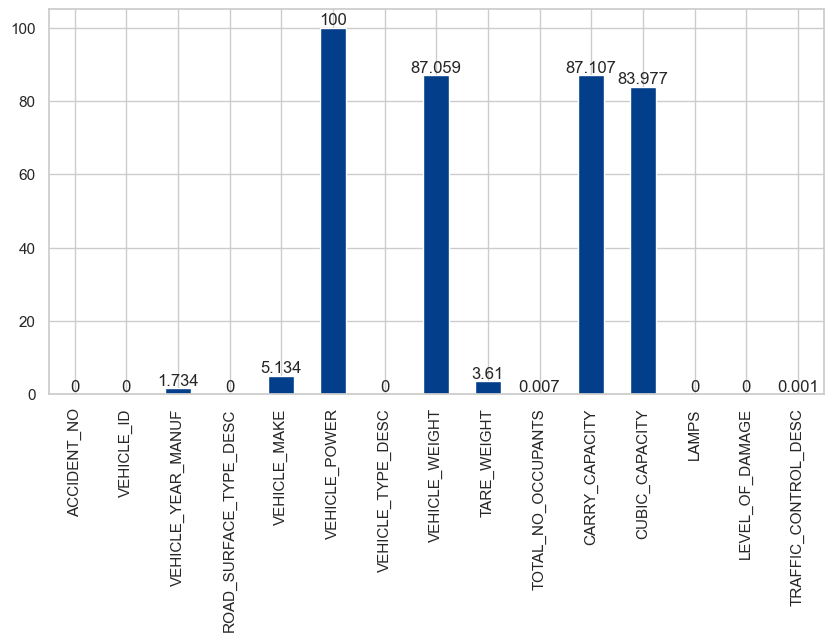

In [200]:
ax = round(((filtered_vehicles.isnull().sum() / len(filtered_vehicles)) * 100),3).plot.bar(figsize=(10,5), color='#023E8A') # plot bar charts displaying missing values in percentage numbers
ax.bar_label(ax.containers[0]) # add data labels for each column
plt.show()

The majority of data points in VEHICLE_POWER, CUBIC_CAPACITY, VEHICLE_WEIGHT, and CARRY_CAPACITY is missing, as a result, we will get rid of them, and convert certain columns to their correct data types:

In [ ]:
filtered_vehicles.drop(['VEHICLE_POWER', 'CUBIC_CAPACITY', 'VEHICLE_WEIGHT', 'CARRY_CAPACITY'], axis = 1, inplace=True) # drop column in the dataset

# Convert LAMPS and LEVEL_OF_DAMAGE to Object datatype
filtered_vehicles['LAMPS'] = filtered_vehicles['LAMPS'].astype('O')
filtered_vehicles['LEVEL_OF_DAMAGE'] = filtered_vehicles['LEVEL_OF_DAMAGE'].astype('O')

Next, we categorize the variables based on their data types and inpsect them:

In [202]:
vehicles_categorical = []
vehicles_numerical = []

for i in filtered_vehicles.columns:
    if filtered_vehicles[i].dtype == 'O':
        vehicles_categorical.append(i)
    
for i in filtered_vehicles.columns:
    if i not in vehicles_categorical:
        vehicles_numerical.append(i)


In [203]:
filtered_vehicles[vehicles_categorical].describe() # Inpsect categorical variables in the dataset

,ACCIDENT_NO,VEHICLE_ID,ROAD_SURFACE_TYPE_DESC,VEHICLE_MAKE,VEHICLE_TYPE_DESC,LAMPS,LEVEL_OF_DAMAGE,TRAFFIC_CONTROL_DESC
count,117871,117871,117871,111819,117871,117871.0,117871,117870
unique,67635,20,4,451,29,4.0,7,17
top,T20230009578,A,Paved,TOYOTA,Car,2.0,4,No control
freq,19,67328,112034,19037,53725,94972.0,25692,79098


In [204]:
filtered_vehicles[vehicles_numerical].describe()# Inpsect numerical variables in the dataset

,VEHICLE_YEAR_MANUF,TARE_WEIGHT,TOTAL_NO_OCCUPANTS
count,115827.000000,113616.000000,117863.000000
mean,1846.066409,1582.467012,1.288734
std,546.089214,1851.626864,1.021012
min,0.000000,0.000000,0.000000
25%,2001.000000,1080.000000,1.000000
50%,2007.000000,1400.000000,1.000000
75%,2013.000000,1682.000000,1.000000
max,2024.000000,96000.000000,96.000000


Upon inspection, some values appear to be logically inconsistent. For instance, VEHICLE_YEAR_MANUF (year of manufacture) includes entries as low as 0, which is not valid. 

Similarly, TARE_WEIGHT (the weight of a vehicle without loadings) contains zero values, which are highly unlikely for real vehicles. Before further investigating these anomalies, let's see how the data is distributed:

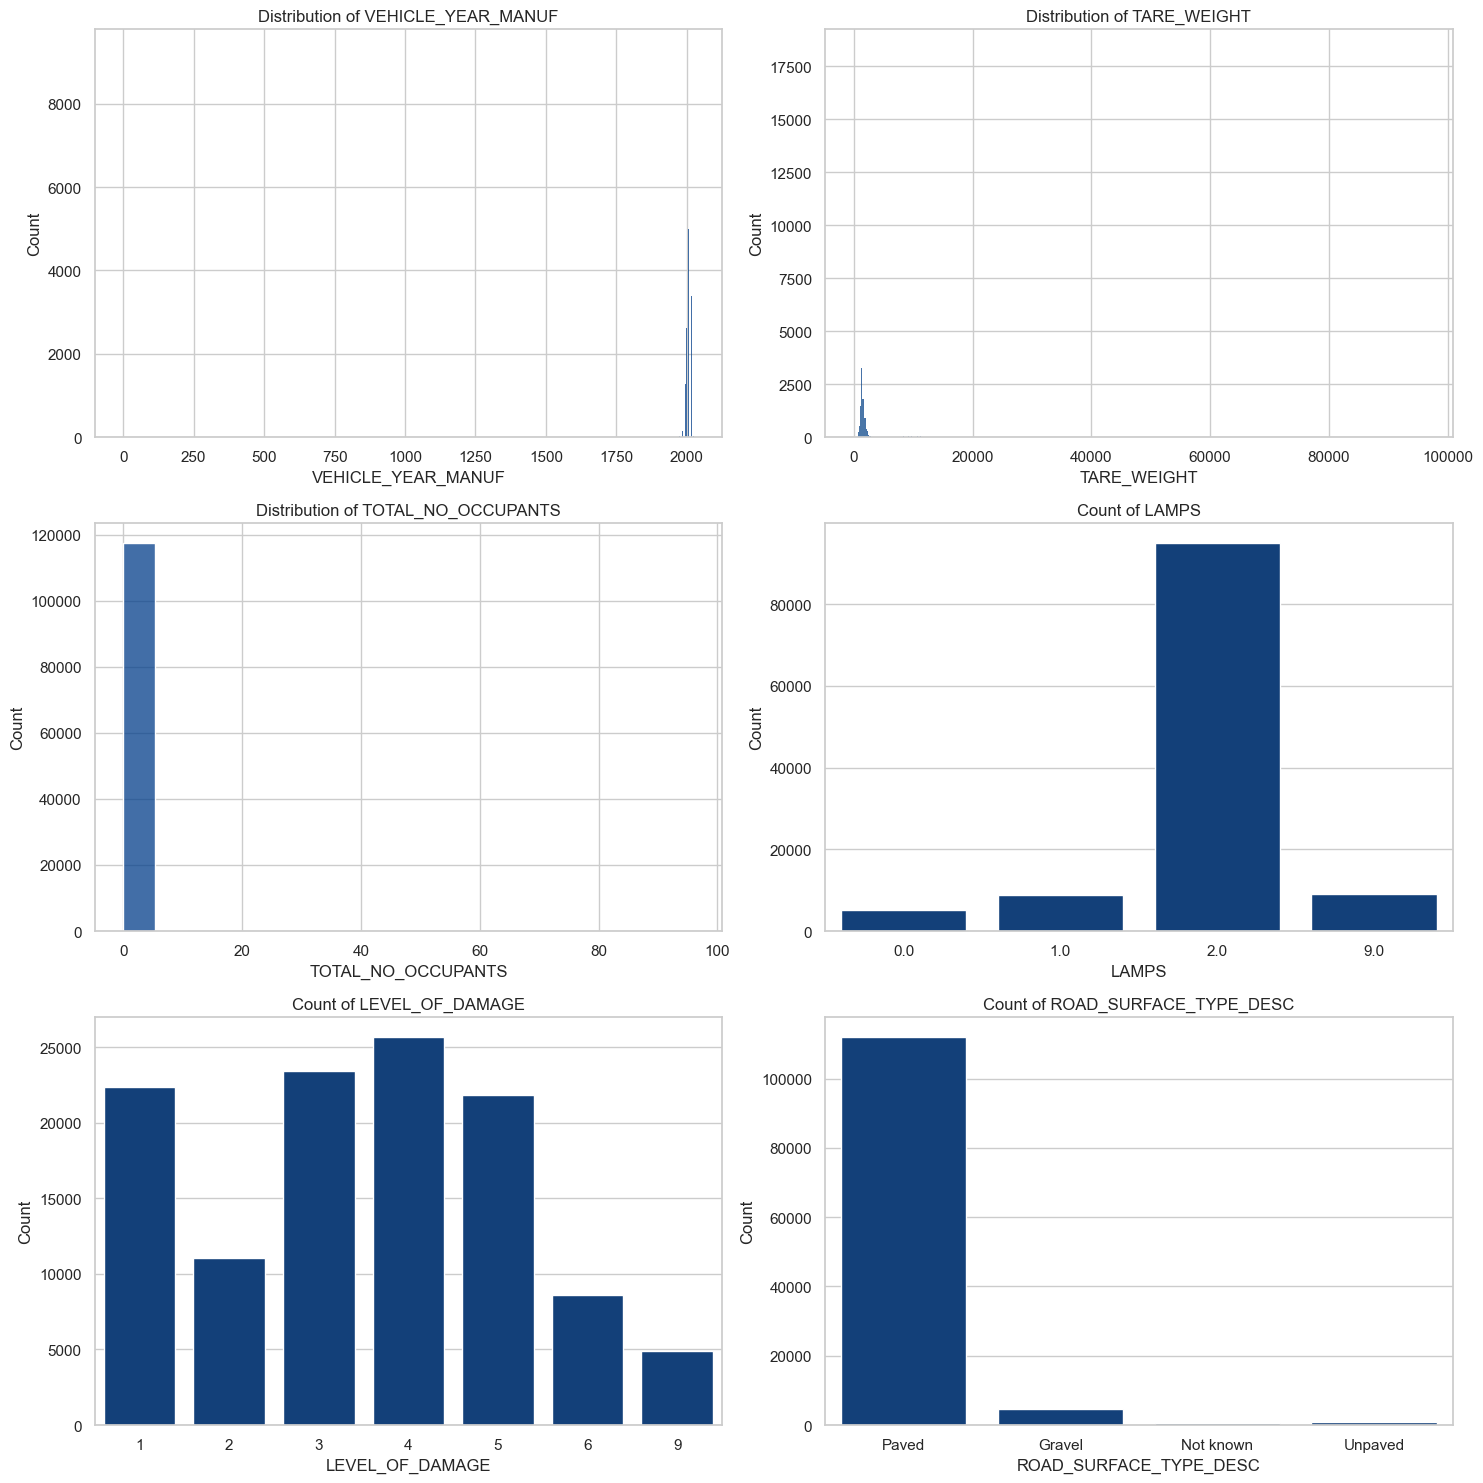

In [205]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Plot numerical columns
for i, col in enumerate(vehicles_numerical):
    sns.histplot(data=filtered_vehicles, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel("Count")

# Plot categorical columns at the end
categorical_cols = ['LAMPS', 'LEVEL_OF_DAMAGE','ROAD_SURFACE_TYPE_DESC']

for j, cat_col in enumerate(categorical_cols, start=len(vehicles_numerical)):
    sns.countplot(data=filtered_vehicles, x=cat_col, ax=axes[j])
    axes[j].set_title(f"Count of {cat_col}")
    axes[j].set_ylabel("Count")

for k in range(len(vehicles_numerical) + len(categorical_cols), len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()

From the charts:

- Both **VEHICLE_YEAR_MANUF** and **TARE_WEIGHT** contain a significant number of outliers, indicating potential data quality issues or extreme cases worth deeper investigation.
- It is concerning that most vehicles involved in serious accidents were headlights off (LAMPS = 2) during ambient road lighting conditions; and in paved surface of roads.
- Most vehicles in serious accidents suffered high levels of damage (LEVEL_OF_DAMAGE = 4, which is the second highest after level 5).
- Note that level 5 and 6 in LEVEL_OF_DAMAGE respectively indicate none and not known damages.

Now, let's investigate the **VEHICLE_YEAR_MANUF** to see why there are extreme values:

In [206]:
filtered_vehicles.VEHICLE_YEAR_MANUF.value_counts(normalize=True).sort_index(ascending=False) * 100 # Calculate the percentage each year account for

VEHICLE_YEAR_MANUF
2024.0    0.029354
2023.0    0.366063
2022.0    0.703636
2021.0    1.045525
2020.0    0.979910
            ...   
1924.0    0.001727
1923.0    0.000863
1910.0    0.000863
1900.0    0.077702
0.0       8.044756
Name: proportion, Length: 97, dtype: float64

It's surprising to see that the year 0 accounts for a high proportion, which is 8% of the dataset. Before we proceed to handle this in **Data Preperation** section, let's see how the variables are correlated:

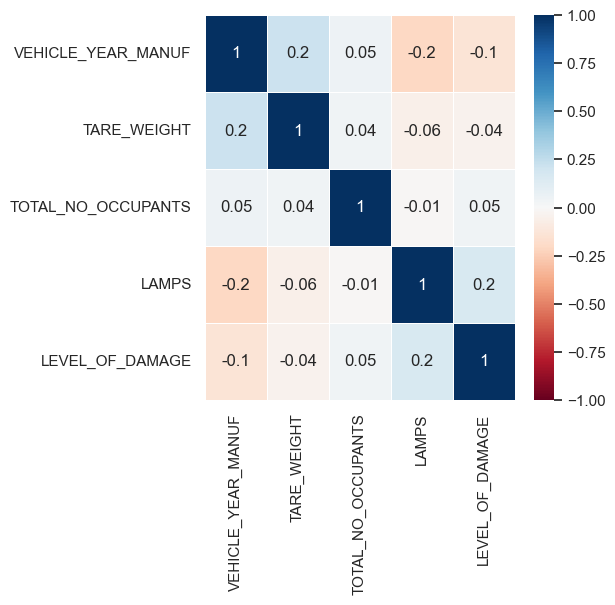

In [207]:
numerical_col = ['VEHICLE_YEAR_MANUF', 'TARE_WEIGHT', 'TOTAL_NO_OCCUPANTS', 'LAMPS', 'LEVEL_OF_DAMAGE']
fig, ax = plt.subplots(figsize=(5,5))
cm = sns.heatmap(filtered_vehicles[numerical_col].corr(), linewidths = .5, cmap="RdBu", annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1)

Seems like nothing special from the matrix. Let's inspect the **Person** dataset

### 3. Person Dataset

First, let's filter the dataset to keep serious accidents only, with focus on **drivers**:

In [208]:
filtered_person = person[person['ACCIDENT_NO'].isin(serious_accidents['ACCIDENT_NO'])] # Keep accidents where their IDs match with the serious_accidents dataframe

filtered_person = filtered_person[filtered_person['SEATING_POSITION'] == 'D'] # Keep people who are drivers

filtered_person.drop(['SEATING_POSITION'], axis = 1, inplace=True) # drop SEATING_POSITION column in the dataset since this column contains only one value ('D')

In [209]:
filtered_person.head()

,ACCIDENT_NO,PERSON_ID,VEHICLE_ID,SEX,AGE_GROUP,HELMET_BELT_WORN,ROAD_USER_TYPE_DESC,TAKEN_HOSPITAL
2,T20210001147,B,B,M,30-39,9.0,Drivers,NaN
8,T20240009524,C,C,F,30-39,1.0,Drivers,NaN
9,T20240009524,D,D,F,60-64,1.0,Drivers,NaN
10,T20240009524,A,A,M,30-39,9.0,Drivers,Y
11,T20240009524,B,B,F,70+,9.0,Drivers,Y


In [210]:
filtered_person.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111431 entries, 2 to 420317
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ACCIDENT_NO          111431 non-null  object 
 1   PERSON_ID            111431 non-null  object 
 2   VEHICLE_ID           111431 non-null  object 
 3   SEX                  111426 non-null  object 
 4   AGE_GROUP            111431 non-null  object 
 5   HELMET_BELT_WORN     111431 non-null  float64
 6   ROAD_USER_TYPE_DESC  111431 non-null  object 
 7   TAKEN_HOSPITAL       60117 non-null   object 
dtypes: float64(1), object(7)
memory usage: 7.7+ MB


We've filtered the dataset to include only drivers, so there should be a one-to-one relationship between the **filtered_vehicles** and **filtered_person** tables—i.e., one driver per vehicle. However, **filtered_vehicles** contains more rows than **filtered_person**, which is unexpected. Let's perform a left join to investigate this mismatch:

In [211]:
merger = filtered_vehicles.merge(filtered_person, on=['ACCIDENT_NO', 'VEHICLE_ID'], how='left', indicator=True) # Left merge the two dataframes on ACCIDENT_NO and VEHICLE_ID

merger[merger['_merge'] != 'both'][['ACCIDENT_NO', 'VEHICLE_ID', 'PERSON_ID']] # Check rows that are not in filtered_person dataframes

,ACCIDENT_NO,VEHICLE_ID,PERSON_ID
3,T20120000013,B,NaN
102,T20120000411,C,NaN
121,T20120000502,B,NaN
131,T20120000557,B,NaN
181,T20120000818,B,NaN
...,...,...,...
117836,T20240019365,E,NaN
117842,T20240019401,B,NaN
117861,T20240025591,B,NaN
117869,T20240031736,B,NaN


There are 6446 rows where people involved in the accidents were not recorded. This suggests that the drivers of these vehicles might ran away after the accidents.

There are some null values in the TAKEN_HOSPITAL. Additionally, HELMET_BELT_WORN should be set as categorical data type. Let's handle these:

In [212]:
filtered_person['HELMET_BELT_WORN'] = filtered_person['HELMET_BELT_WORN'].astype('O') # Convert data type to Object

<Axes: >

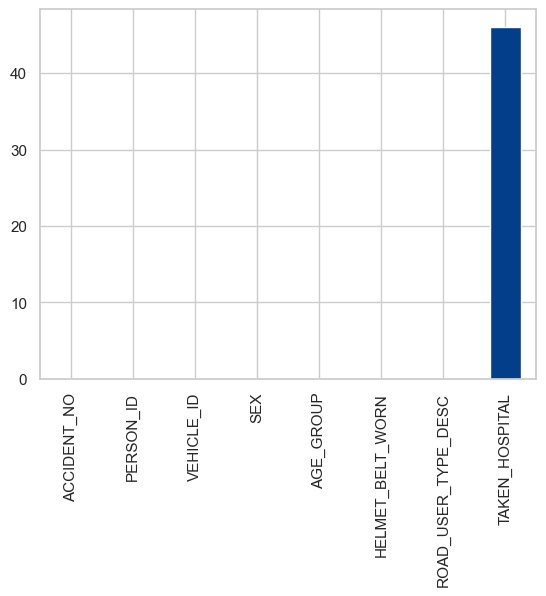

In [213]:
(filtered_person.isnull().sum()/len(filtered_person) * 100).plot.bar() # Plot bar showing missing values in percentage

**TAKEN_HOSPITAL** has many missing values, let's just drop it:

In [214]:
filtered_person.drop(['TAKEN_HOSPITAL'], axis = 1, inplace=True) # Drop TAKEN_HOSPITAL column in the dataset

Now, let's see the age group of drivers in serious cases:

In [215]:
filtered_person[(filtered_person['ROAD_USER_TYPE_DESC'] == 'Drivers') | (filtered_person['ROAD_USER_TYPE_DESC'] == 'Motorcyclists')]['AGE_GROUP'].value_counts().sort_index(ascending=False)

AGE_GROUP
Unknown     1477
70+         9365
65-69       4209
60-64       5643
50-59      14676
5-12          12
40-49      17452
30-39      20193
26-29       9943
22-25      10927
18-21      10213
16-17        615
13-15        117
0-4            2
Name: count, dtype: int64

It is concerning to see that many **teenagers under 18 or even children are allowed to drive cars or motorcycles** that caused serious accidents, while **the legal age to control these vehicles in Victoria is 18**. This raises critical questions about license enforcement, vehicle access, and parental or supervisory responsibility.

Now, let's have a quick look at how the data is distributed:

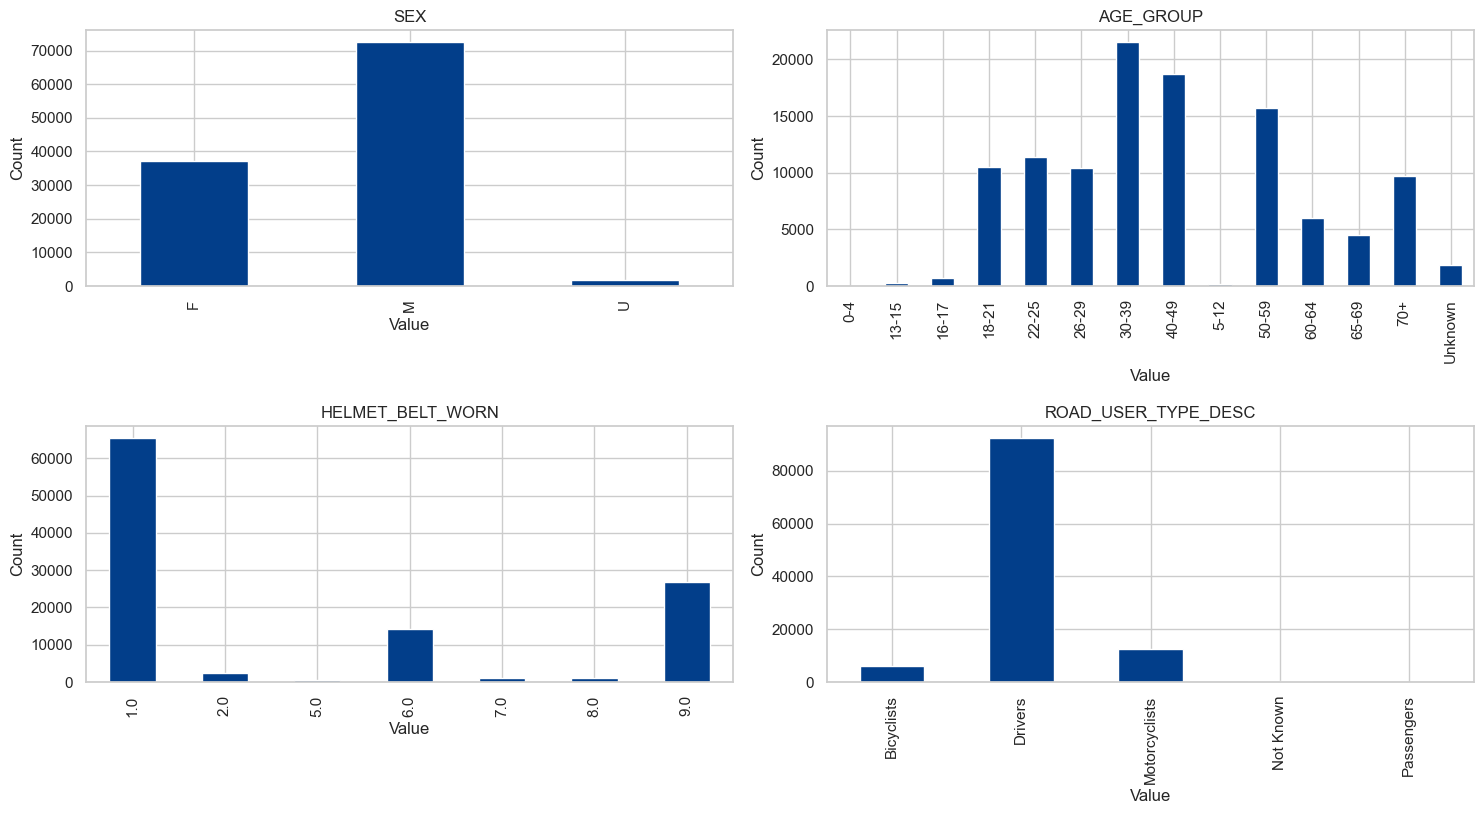

In [216]:
column = ['SEX', 'AGE_GROUP', 'HELMET_BELT_WORN', 'ROAD_USER_TYPE_DESC']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))  # adjust rows/cols as needed
axes = axes.flatten()  # flatten to 1D array for easy looping

# Plot each column as bar chart
for i, col in enumerate(column):
    filtered_person[col].value_counts().sort_index().plot.bar(ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Count")

# Hide any unused axes if columns < subplot cells
for j in range(len(column), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From the above charts

- Male drivers were involved in serious road crashes nearly 2 times more than females.
- Senior citizens (age 39-59) tend to cause more severe accidents than other age groups.
- Most cases were recorded with seatbelts worn (HELMET_BELT_WORN = 1).


### 4. Node Dataset

In [217]:
filtered_node = node[node['ACCIDENT_NO'].isin(serious_accidents['ACCIDENT_NO'])] # Keep accident nodes where their IDs match with the serious_accidents dataframe

filtered_node.head()

,ACCIDENT_NO,LGA_NAME,DEG_URBAN_NAME,LATITUDE,LONGITUDE,POSTCODE_CRASH
7,T20130013524,MELBOURNE,MELBOURNE_CBD,-37.811459,144.970273,3000
8,T20130021038,MELBOURNE,MELB_URBAN,-37.808158,144.968743,3000
10,T20130021038,MELBOURNE,MELBOURNE_CBD,-37.808158,144.968743,3000
14,T20130006074,MELBOURNE,MELB_URBAN,-37.802170,144.957610,3000
22,T20130017220,MELBOURNE,MELBOURNE_CBD,-37.816385,144.955727,3000


In [218]:
filtered_node.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 68686 entries, 7 to 182632
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ACCIDENT_NO     68686 non-null  object 
 1   LGA_NAME        68686 non-null  object 
 2   DEG_URBAN_NAME  68250 non-null  object 
 3   LATITUDE        68686 non-null  float64
 4   LONGITUDE       68686 non-null  float64
 5   POSTCODE_CRASH  68686 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB


<Axes: >

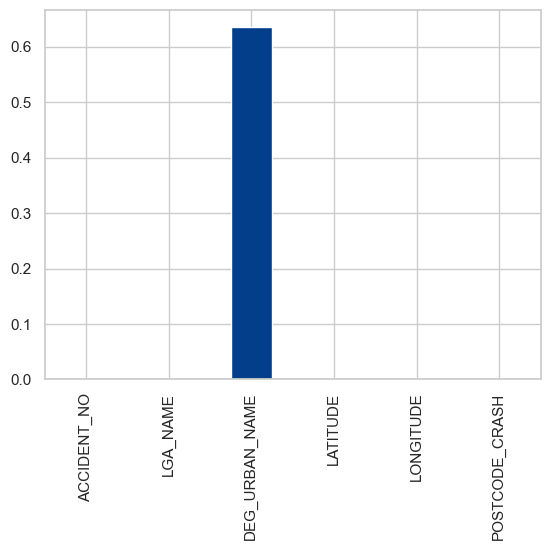

In [219]:
(filtered_node.isnull().sum() / len(filtered_node) * 100).plot.bar() # Plot bar showing missing values in percentage

DEG_URBAN_NAME contains 0.65% of missing values, so we will not do anything to it. Let's check if the data is duplicated:

In [220]:
filtered_node['ACCIDENT_NO'].duplicated().sum()

np.int64(1128)

The dataset contains duplicates. Let's remove them:

In [221]:
filtered_node = filtered_node[~filtered_node['ACCIDENT_NO'].duplicated()] # Remove duplicated rows based on ACCIDENT_NO

Now, we're curious to see which LGAs (Local Government Areas), urban degree, and postcodes had the highest number of severe accidents of all time:

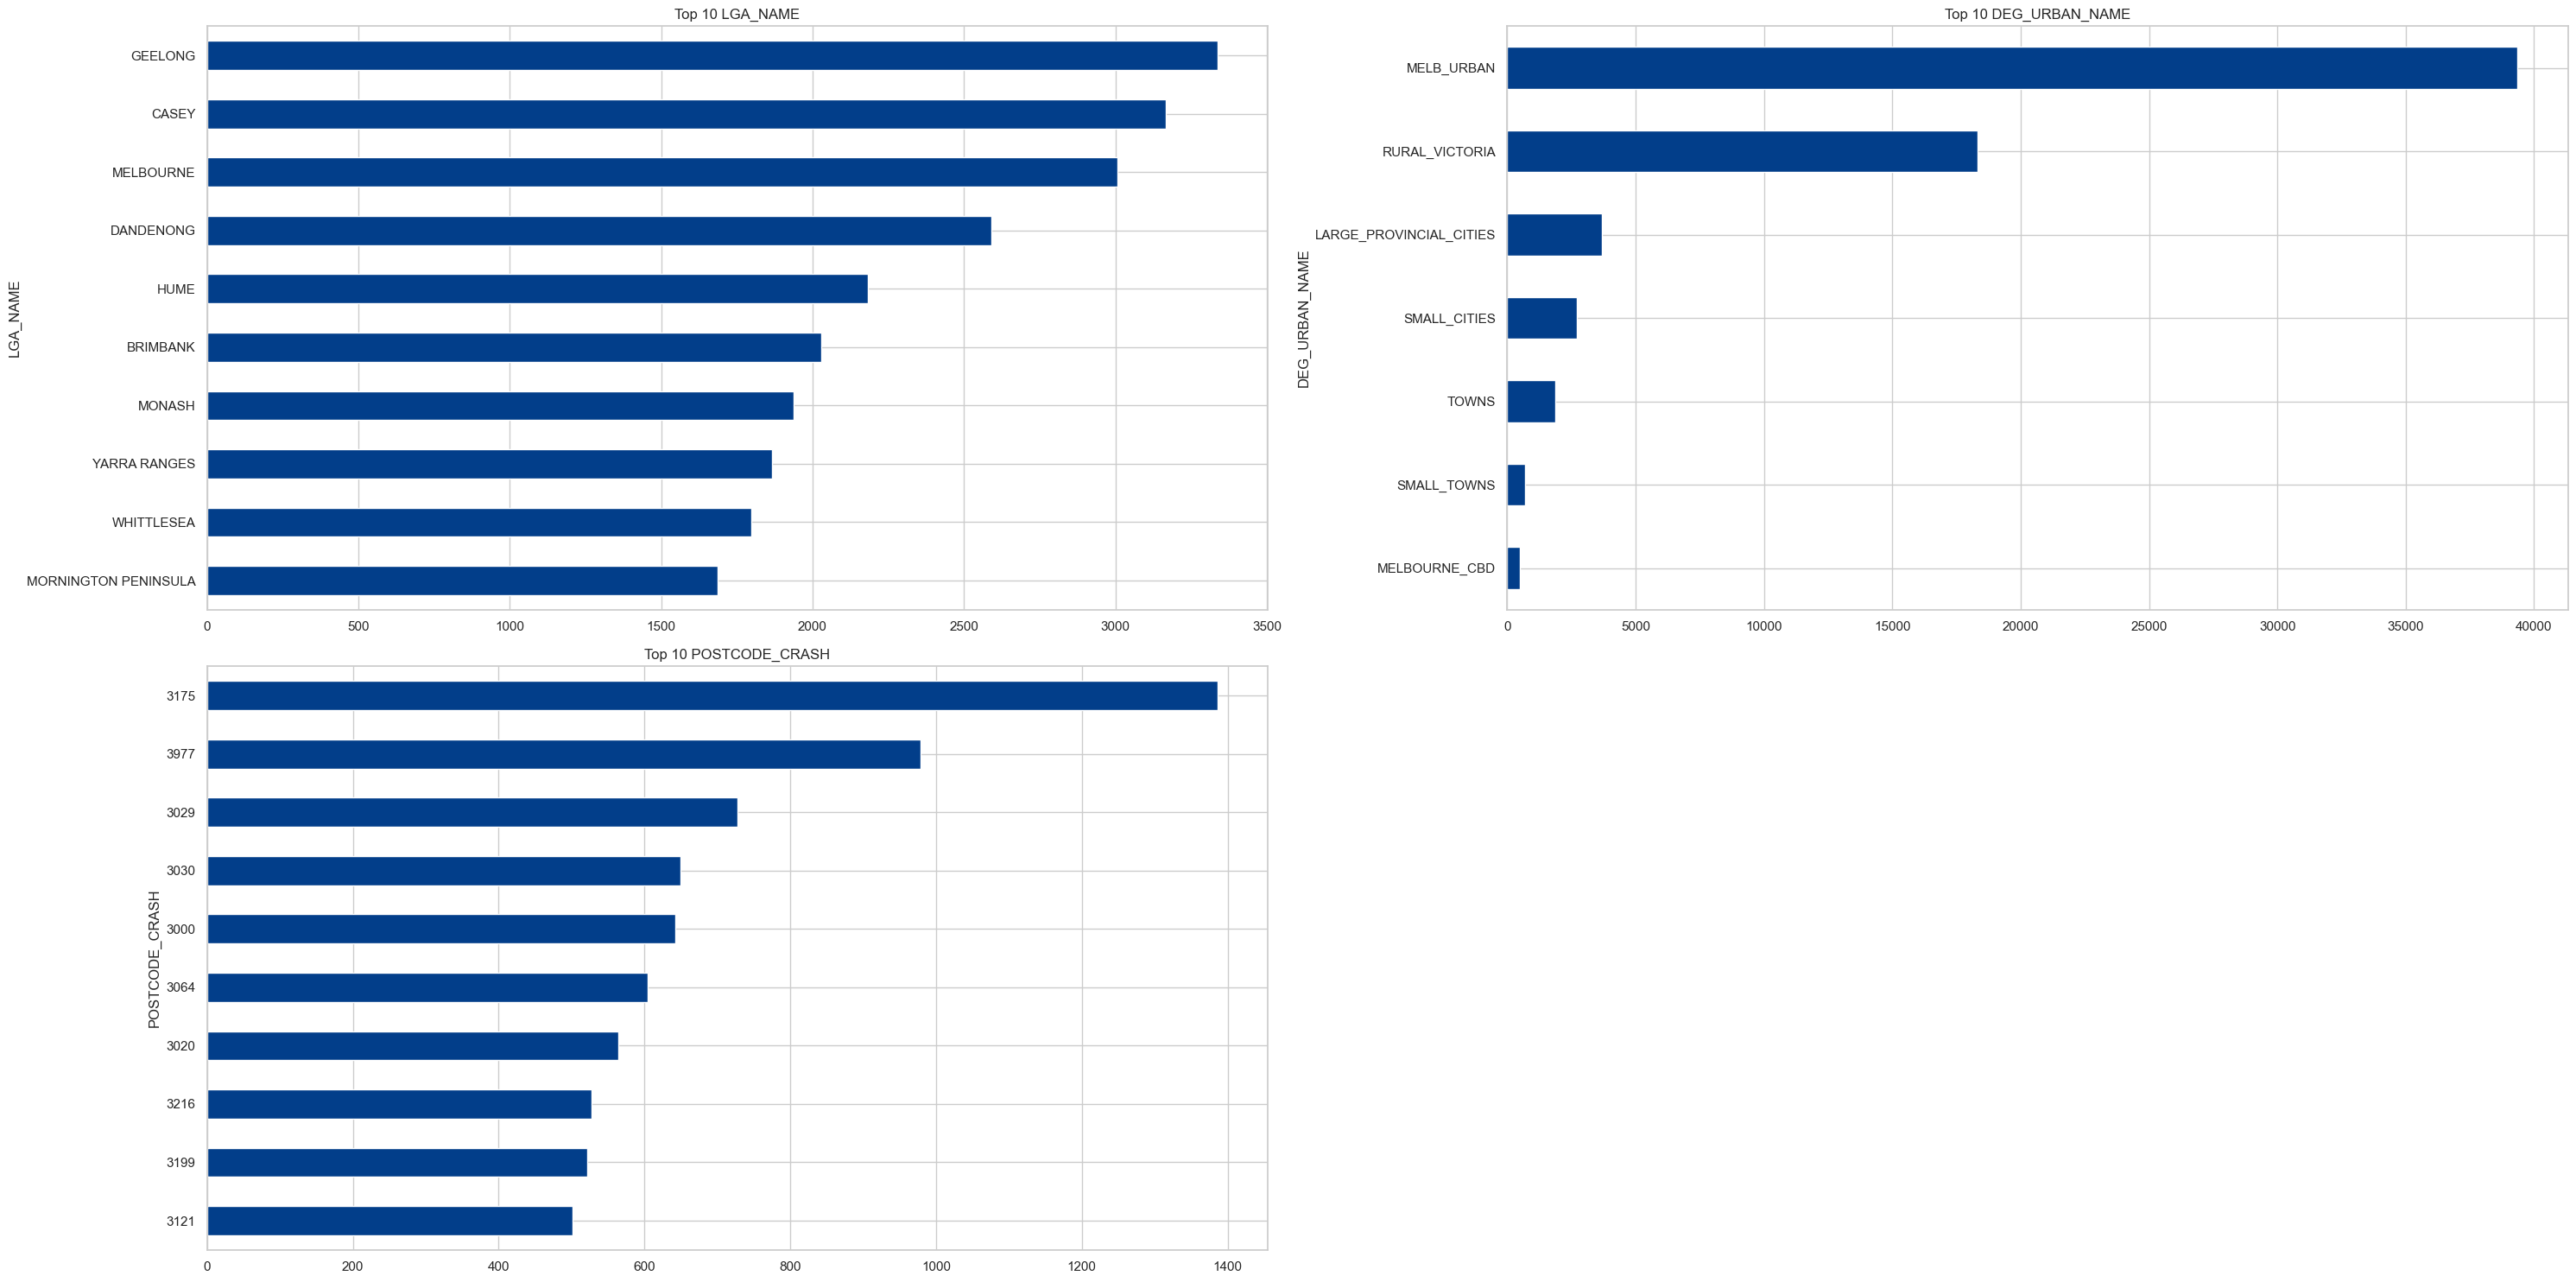

In [222]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30,15))
axes = axes.flatten() # flatten to 1D array for easy looping

categorical_cols = ['LGA_NAME', 'DEG_URBAN_NAME', 'POSTCODE_CRASH'] # A list of variables to be plotted

for i, col in enumerate(categorical_cols):
    filtered_node[col].value_counts().sort_values(ascending=True).tail(10).plot.barh(ax=axes[i])
    axes[i].set_title(f"Top 10 {col}")

fig.delaxes(axes[len(categorical_cols)]) # Hide any unused axes if columns < subplot cells

plt.tight_layout()
plt.show()

From the charts, several key observations emerge:

- Geelong, Casey, and Melbourne are the top three LGAs with the highest number of serious accidents.
- The Melbourne urban area accounts for nearly 40,000 major accidents—more than double the number recorded in Victoria’s rural regions, which rank second overall.
- Dandenong South (3175 VIC) stands out as the suburb with the highest number of serious accidents across all time periods in the dataset.

## III. Data Preperation

In this part, we will prepare the data for the **Data Analysis** section by going through each dataset and handle missing values, outliers, and data types.

First, let's look at the **serious_accidents** dataset:

In [ ]:
serious_accidents["ACCIDENT_DATE"] = pd.to_datetime(serious_accidents["ACCIDENT_DATE"]) # set ACCIDENT_DATE to datetime datatype
serious_accidents['ACCIDENT_TIME'] = pd.to_datetime(serious_accidents['ACCIDENT_TIME'], format='%H:%M:%S', errors='coerce') # set ACCIDENT_TIME to datetime datatype

In [224]:
serious_accidents.head()

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE_DESC,DAY_WEEK_DESC,LIGHT_CONDITION,NO_OF_VEHICLES,NO_PERSONS_KILLED,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_NOT_INJ,NO_PERSONS,ROAD_GEOMETRY_DESC,SEVERITY,SPEED_ZONE,RMA
1,T20120000012,2012-01-01,1900-01-01 02:00:00,Collision with vehicle,Sunday,3,2,0,1,0,2,3,Cross intersection,2,80,NaN
2,T20120000013,2012-01-01,1900-01-01 03:35:00,Collision with vehicle,Sunday,3,2,0,1,0,0,1,T intersection,2,60,Arterial Other
5,T20120000028,2012-01-01,1900-01-01 04:00:00,Collision with a fixed object,Sunday,5,1,0,1,0,0,1,T intersection,2,100,NaN
7,T20120000043,2012-01-01,1900-01-01 00:45:00,Collision with vehicle,Sunday,5,2,0,2,0,1,3,T intersection,2,80,Arterial Highway
8,T20120000044,2012-01-01,1900-01-01 16:25:00,Collision with vehicle,Sunday,1,2,0,1,0,1,2,T intersection,2,60,Arterial Other


The **ACCIDENT_TIME** column has been converted to a datetime data type, defaulting to the date 1900-01-01 with the actual time of the accident preserved.
Since the analysis focuses solely on the time of day (not the date), this default date will not affect the results.

Now, I also want to add a column with **month and year** values of an accident. This supports analyses focusing on monthly trend overtime:

In [ ]:
serious_accidents['YEAR_MONTH'] = serious_accidents['ACCIDENT_DATE'].dt.to_period('M') # Create a new column 'YEAR_MONTH' in the dataframe

The dataset is now ready for the next stage. Let's look at **filtered_vehicles**:

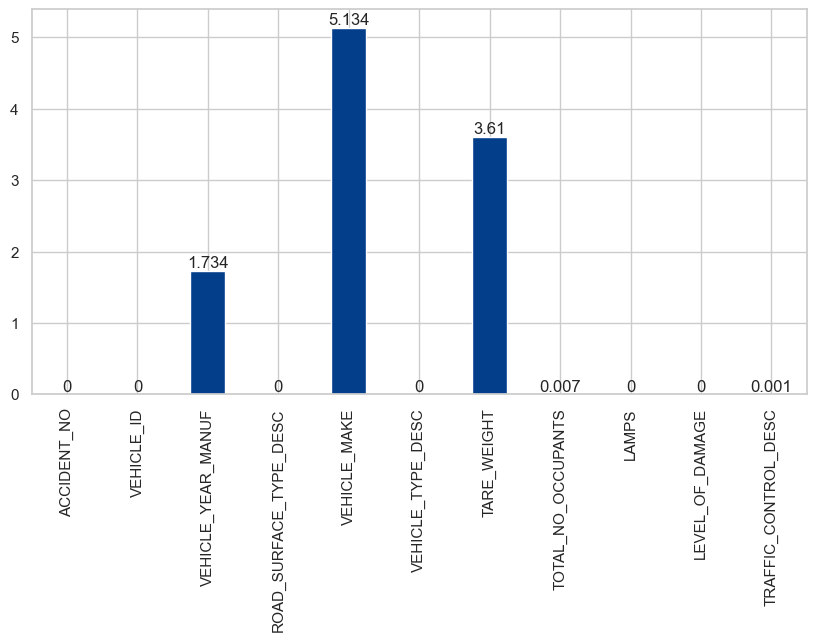

In [226]:
# Cheking the percentage of missing values wihtin each column
ax = round(((filtered_vehicles.isnull().sum() / len(filtered_vehicles)) * 100),3).plot.bar(figsize=(10,5))
ax.bar_label(ax.containers[0]) # add data labels for each column
plt.show()

Let's see what we can do with TARE_WEIGHT:

In [227]:
filtered_vehicles['TARE_WEIGHT'].value_counts().sort_index(ascending=True) # Check the distribution of TARE_WEIGHT values

TARE_WEIGHT
0.0        18277
1.0            5
4.0            4
5.0            3
11.0           1
           ...  
37880.0        1
44850.0        1
48000.0        1
60000.0        1
96000.0        1
Name: count, Length: 3166, dtype: int64

Since there are some 0 values in TARE_WEIGHT, we assume that these are records of vehicles with unknown weight. Therefore, we will replace it to NaN value

In [ ]:
 # Replace 0 with NaN in TARE_WEIGHT column
filtered_vehicles['TARE_WEIGHT'] = filtered_vehicles['TARE_WEIGHT'].replace(0,np.nan)

Now, let's see which vehicle types contribute most to missing values:

In [229]:
filtered_vehicles[filtered_vehicles.TARE_WEIGHT.isnull()]["VEHICLE_TYPE_DESC"].value_counts(normalize=True) * 100

VEHICLE_TYPE_DESC
Motor Cycle                                           51.402450
Bicycle                                               26.553346
Not Known                                              6.515178
Car                                                    6.053613
Motor Scooter                                          2.596307
Station Wagon                                          1.699805
Tram                                                   1.349192
Other Vehicle                                          1.269306
Utility                                                0.754483
Panel Van                                              0.239659
Moped                                                  0.230783
Quad Bike                                              0.190840
Train                                                  0.181963
Taxi                                                   0.150897
Prime Mover - Single Trailer                           0.137582
Heavy Vehicle (Rigid) 

Motorcycles and bicycles account for approximately 80% of the missing values in the TARE_WEIGHT column.


To address this issue, a method known as **median imputation** can be applied—replacing missing values with the median TARE_WEIGHT of each respective vehicle type.
This approach maintains consistency and reduces the risk of bias, ensuring the imputed values reflect the typical characteristics of each vehicle group.

First, let's see the median values for each vehicle type:

In [230]:
for i in filtered_vehicles.VEHICLE_TYPE_DESC.unique():  # Loop through each unique vehicle type
    tare_weights = filtered_vehicles[filtered_vehicles.VEHICLE_TYPE_DESC == i]['TARE_WEIGHT'].dropna()
    if not tare_weights.empty:
        median_tare_weight = tare_weights.median()
        print(f'{i}: {median_tare_weight}')
    else:
        print(f'{i}: No valid TARE_WEIGHT data')

Car: 1305.0
Station Wagon: 1630.0
Motor Cycle: 191.0
Utility: 1791.0
Bicycle: 20.0
Taxi: 1560.0
Panel Van: 1750.0
Prime Mover Only: 9240.0
Heavy Vehicle (Rigid) > 4.5 Tonnes: 9566.0
Light Commercial Vehicle (Rigid) <= 4.5 Tonnes GVM: 2615.0
Prime Mover B-Double: 9300.0
Other Vehicle: 2920.0
Moped: 847.0
Prime Mover - Single Trailer: 9065.0
Bus/Coach: 10980.0
Motor Scooter: 150.0
Mini Bus(9-13 seats): 2075.0
Not Known: 2041.0
Tram: 3550.0
Train: No valid TARE_WEIGHT data
Plant machinery and Agricultural equipment: 7152.5
Not Applicable: 5080.0
Prime Mover B-Triple: 9540.0
Horse (ridden or drawn): No valid TARE_WEIGHT data
Quad Bike: 291.0
Parked trailers: 1080.0
Rigid Truck(Weight Unknown): 6140.0
Prime Mover (No of Trailers Unknown): 9273.0
Electric Device: No valid TARE_WEIGHT data


Now we just need to fill missing values within each vehicle type to its according median values we just calculated:

In [ ]:
for i in filtered_vehicles.VEHICLE_TYPE_DESC.unique():
    median_tare_weight = filtered_vehicles[(filtered_vehicles.VEHICLE_TYPE_DESC == i)]['TARE_WEIGHT'].median()

    filtered_vehicles['TARE_WEIGHT'][filtered_vehicles['VEHICLE_TYPE_DESC'] == i] = filtered_vehicles['TARE_WEIGHT'].fillna(median_tare_weight) # Fill the missing values with the median tare weight of each vehicle type

Let's check if we have any missing values left:

In [232]:
filtered_vehicles[(filtered_vehicles.TARE_WEIGHT.isnull())]['VEHICLE_TYPE_DESC'].value_counts() # Check if there are still any missing values in TARE_WEIGHT column

VEHICLE_TYPE_DESC
Train                      41
Horse (ridden or drawn)    16
Electric Device             4
Name: count, dtype: int64

Train, Horse, and Electric Device still have missing values because weight for these vehicles were not recorded throughout the dataset. Thus, median values for these vehicles cannot be calculated.

Now, we will apply the same process to VEHICLE_YEAR_MANUF, which we replace missing values to the median values for each vehicle type accordingly. 

In [ ]:
filtered_vehicles['VEHICLE_YEAR_MANUF'] = filtered_vehicles['VEHICLE_YEAR_MANUF'].replace(0, np.nan) # Replace 0 with NaN in VEHICLE_YEAR_MANUF column

for i in filtered_vehicles.VEHICLE_TYPE_DESC.unique():
    median_year_manuf = filtered_vehicles[(filtered_vehicles.VEHICLE_TYPE_DESC == i)]['VEHICLE_YEAR_MANUF'].median()

    filtered_vehicles['VEHICLE_YEAR_MANUF'][filtered_vehicles['VEHICLE_TYPE_DESC'] == i] = filtered_vehicles['VEHICLE_YEAR_MANUF'].fillna(median_year_manuf) # Fill the missing values with the median year manufacture of each vehicle type

Now, let's check the extreme values in **VEHICLE_YEAR_MANUF**:

<Axes: >

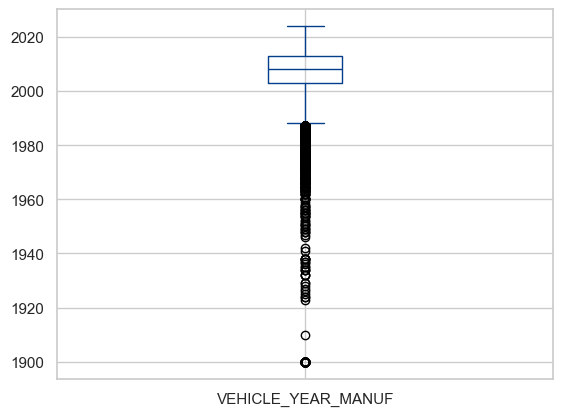

In [234]:
filtered_vehicles['VEHICLE_YEAR_MANUF'].plot.box() # Plot histogram of VEHICLE_YEAR_MANUF column

There are old vehicles were made in the 1900s, so we will just keep the values.

# IV. Data Analysis and Visualization

This section aims to dive more deeply into the prepared data and discover impactful insights.

In [235]:
serious_accidents 

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE_DESC,DAY_WEEK_DESC,LIGHT_CONDITION,NO_OF_VEHICLES,NO_PERSONS_KILLED,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_NOT_INJ,NO_PERSONS,ROAD_GEOMETRY_DESC,SEVERITY,SPEED_ZONE,RMA,YEAR_MONTH
1,T20120000012,2012-01-01,1900-01-01 02:00:00,Collision with vehicle,Sunday,3,2,0,1,0,2,3,Cross intersection,2,80,NaN,2012-01
2,T20120000013,2012-01-01,1900-01-01 03:35:00,Collision with vehicle,Sunday,3,2,0,1,0,0,1,T intersection,2,60,Arterial Other,2012-01
5,T20120000028,2012-01-01,1900-01-01 04:00:00,Collision with a fixed object,Sunday,5,1,0,1,0,0,1,T intersection,2,100,NaN,2012-01
7,T20120000043,2012-01-01,1900-01-01 00:45:00,Collision with vehicle,Sunday,5,2,0,2,0,1,3,T intersection,2,80,Arterial Highway,2012-01
8,T20120000044,2012-01-01,1900-01-01 16:25:00,Collision with vehicle,Sunday,1,2,0,1,0,1,2,T intersection,2,60,Arterial Other,2012-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179866,T20240019357,2024-07-31,1900-01-01 19:58:00,Collision with vehicle,Wednesday,3,2,0,1,0,1,2,Cross intersection,2,50,Local Road,2024-07
179867,T20240019358,2024-07-31,1900-01-01 19:02:00,Collision with vehicle,Wednesday,3,2,0,1,0,2,3,T intersection,2,40,NaN,2024-07
179868,T20240019359,2024-07-31,1900-01-01 16:10:00,Collision with a fixed object,Wednesday,1,1,0,2,1,0,3,Not at intersection,2,100,Local Road,2024-07
179872,T20240019274,2024-07-31,1900-01-01 06:50:00,Collision with vehicle,Wednesday,2,2,0,1,0,1,2,Not at intersection,2,50,Local Road,2024-07


To begin, we will explore the temporal trends of serious accidents by plotting a time series chart.

This will help identify any patterns or seasonal variations over the years.
To achieve this, we will aggregate the number of serious accidents by month and year using a **groupby** operation.

In [236]:
monthly_trend = serious_accidents.groupby('YEAR_MONTH').agg(num_accidents=('ACCIDENT_NO', 'count')).reset_index() # Group by YEAR_MONTH and count the number of accidents
monthly_trend['YEAR_MONTH'] = monthly_trend['YEAR_MONTH'].dt.to_timestamp() # Convert to timestamp for plotting

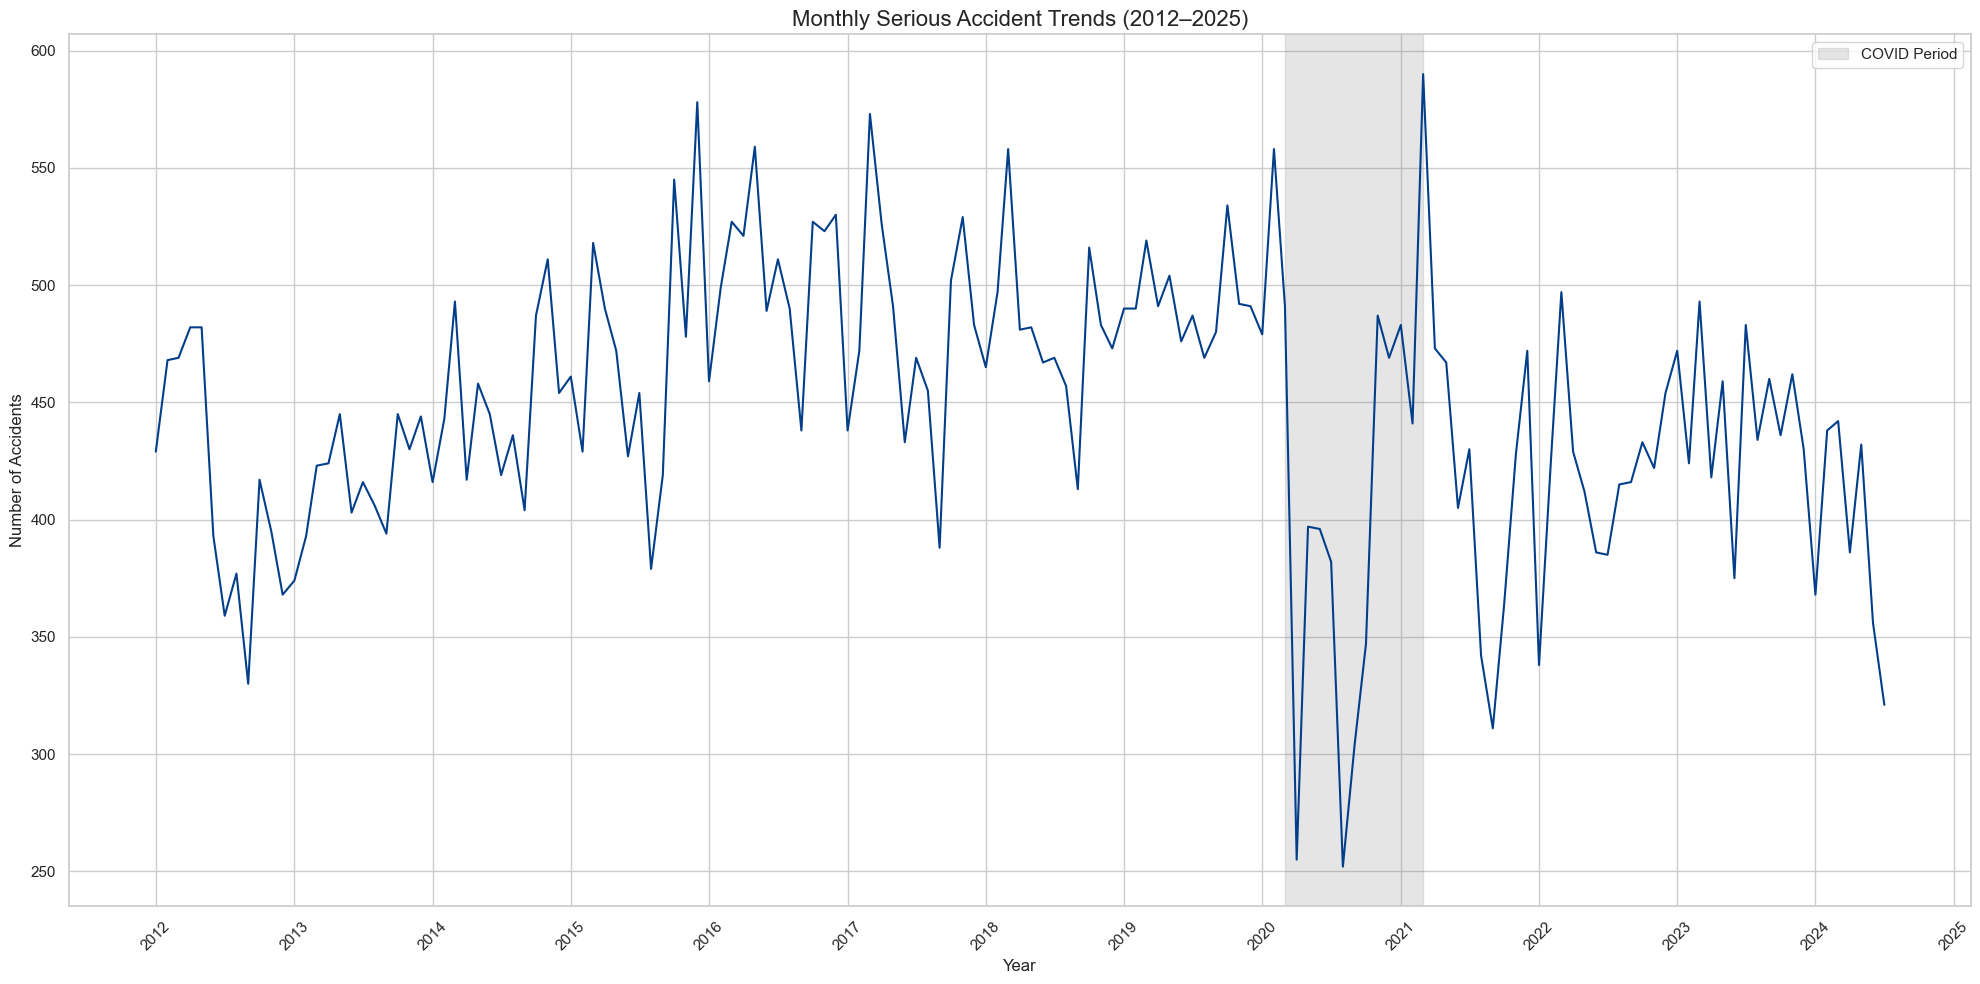

In [237]:
import matplotlib.dates as mdates

plt.figure(figsize=(20,10))
sns.lineplot(data=monthly_trend, x='YEAR_MONTH', y='num_accidents') # Plot the number of serious accidents over time

# Highlight COVID
plt.axvspan(pd.to_datetime('2020-03-01'), pd.to_datetime('2021-03-01'), color='gray', alpha=0.2, label='COVID Period')

# Format X-axis to show all years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Show one tick per year

plt.title("Monthly Serious Accident Trends (2012–2025)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


The chart reveals a clear seasonal pattern in serious accidents: incidents typically peak at the start of the year, decline sharply during the mid-year winter months, then rise again post-winter creating a second peak before decreasing toward year-end — **forming a consistent V-shaped trend annually**.


A notable decline is observed in early 2020, aligning with the onset of COVID-19 lockdowns. This drop reflects the global trend of reduced road activity due to restrictions. While accident numbers gradually rebound in the following months, post-pandemic fluctuations remain high, suggesting potential shifts in traffic patterns or behavior.

Before focusing on serious accidents only, let's find out which LGAs have most accidents of all severity levels. To do this, we will use the **node** instead of **filtered_node** dataframe to inspect all accidents: 

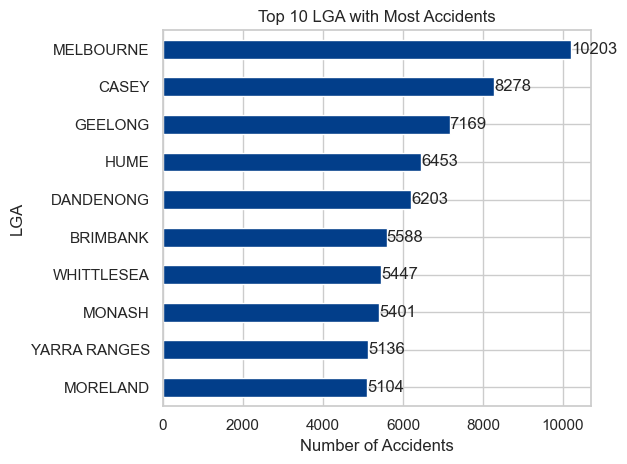

In [238]:
# Get the top 10 LGAs with most accidents by using node instead of filtered_node dataframe
top_10_LGA_most_accidents = node['LGA_NAME'].value_counts(ascending=True).tail(10) 
ax = top_10_LGA_most_accidents.plot.barh()
ax.bar_label(ax.containers[0])

plt.title('Top 10 LGA with Most Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('LGA')
plt.tight_layout()

From the chart, it can be seen that Melbourne, Casey, and Geelong have the highest number of accidents, with more than 10000 cases recorded in Melbourne. Now, let's see which LGAs observe most **serious accidents**, which is the focus of this report:

In [239]:
serious_accidents_with_node_df = serious_accidents.merge(filtered_node, how='inner') # Merge serious accidents with node data to get location information

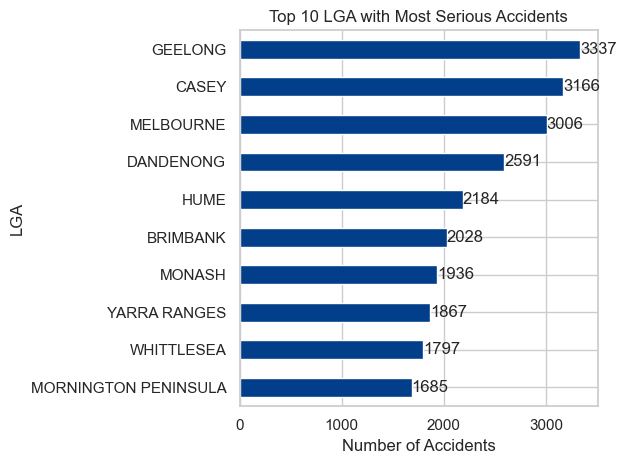

In [240]:
top_10_LGA_most_serious_accidents = serious_accidents_with_node_df['LGA_NAME'].value_counts(ascending=True).tail(10) # Get the top 10 LGAs with most serious accidents
ax = top_10_LGA_most_serious_accidents.plot.barh()
ax.bar_label(ax.containers[0])

plt.title('Top 10 LGA with Most Serious Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('LGA')
plt.tight_layout()

This time, both Melbourne and Geelong remain in the top three, but notably, their rankings have shifted — Geelong now holds the top spot.

These insights suggest that while Melbourne experiences a higher volume of accidents overall, it records fewer serious accidents compared to Geelong. This implies that **Geelong has a higher proportion of severe accidents**, making it a more critical area for targeted safety interventions.

Let’s validate this observation by calculating the serious accident rate for these LGAs:

In [241]:
top_10_LGA_most_serious_accidents_df = serious_accidents_with_node_df[serious_accidents_with_node_df['LGA_NAME'].isin(top_10_LGA_most_serious_accidents.reset_index().LGA_NAME.unique())] # create a new dataframe with only the top 10 LGAs with most serious accidents

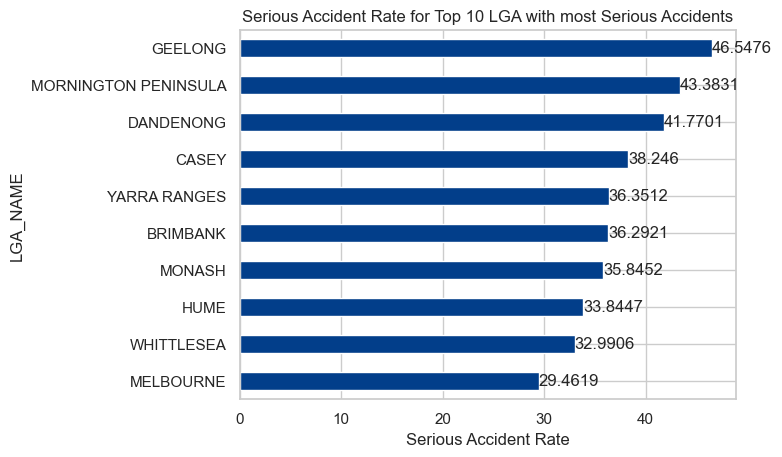

In [242]:
ax = (((top_10_LGA_most_serious_accidents_df['LGA_NAME'].value_counts() / node['LGA_NAME'].value_counts())) * 100).dropna().sort_values(ascending=True).tail(10).plot.barh() # Calculate the serious accident rate for each LGA and plot the top 10

ax.bar_label(ax.containers[0])
plt.title('Serious Accident Rate for Top 10 LGA with most Serious Accidents')
plt.xlabel('Serious Accident Rate')
plt.show()

Plotting the serious accident rates across LGAs reveals a striking insight: **Melbourne now ranks the lowest**, while **Geelong leads with the highest rate** — at 29% and 46%, respectively. This means that nearly **1 in 2 accidents in Geelong is classified as serious**, a rate significantly higher than Melbourne's. Such a disparity underscores the urgent need for targeted road safety interventions in Geelong by local authorities.

This raises an important question: **Why is there such a huge difference in the serious accident rates between Geelong and Melbourne, although the total number of all accidents in Melbourne is higher than Geelong's? What factors — including local government policies, infrastructure, or driving behavior — may be contributing to this gap?**

To explore this further, let's begin by creating a new dataframe that focuses specifically on accidents in Geelong and Melbourne. This will allow us to conduct a deeper comparative analysis between the two cities.

In [243]:
# Filter the top 10 LGAs with most serious accidents to get only Geelong and Melbourne
Geelong_Melbourne_data_severe = top_10_LGA_most_serious_accidents_df[top_10_LGA_most_serious_accidents_df['LGA_NAME'].isin(['GEELONG','MELBOURNE'])]

Before proceeding, let's create a dataframe that contains all accidents in Geelong and Melbourne, which helps calculate rate of serious accidents more easily later on:

In [ ]:
node = node[~node['ACCIDENT_NO'].duplicated()] # Remove duplicate rows in node dataframe based on ACCIDENT_NO
accidents_node = accidents.merge(node, how='inner') # Merge accidents and node dataframes

geelong_melbourne_all_accidents = accidents_node[accidents_node['LGA_NAME'].isin(['GEELONG','MELBOURNE'])] # keep all acidents in Geelong and Melbourne

geelong_melbourne_all_accidents['ACCIDENT_DATE'] = pd.to_datetime(geelong_melbourne_all_accidents['ACCIDENT_DATE']) # set ACCIDENT_DATE to datetime datatype

Now, we will analyse the annual trend of **all accidents** and **serious accidents only** for both cities:

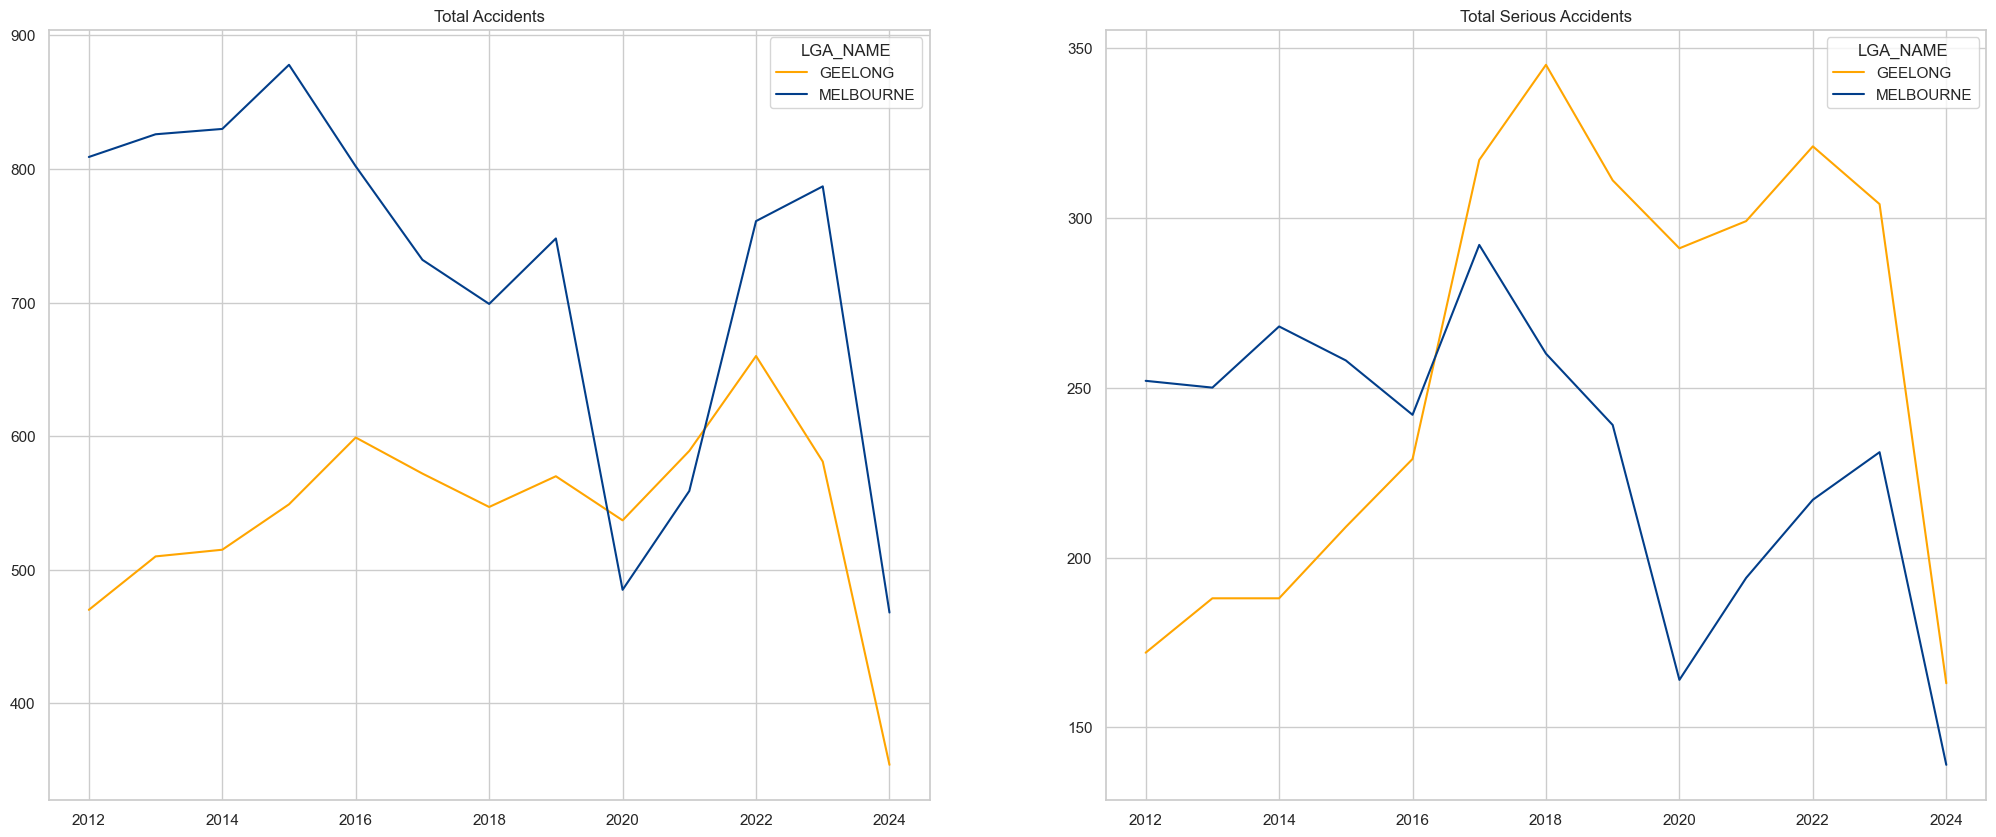

In [245]:
plt.figure(figsize=(25, 10))

# Plotting the total accidents for Geelong and Melbourne
plt.subplot(1,2,1)

# group by year and LGA_NAME, count the number of accidents, and then plot a line chart
sns.lineplot(data=geelong_melbourne_all_accidents.groupby([geelong_melbourne_all_accidents['ACCIDENT_DATE'].dt.year, geelong_melbourne_all_accidents.LGA_NAME]).agg(count=('ACCIDENT_NO', 'count')).reset_index(), x='ACCIDENT_DATE', y='count', hue="LGA_NAME", palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'})
plt.title('Total Accidents')
plt.ylabel('') 
plt.xlabel('')

# Plotting the total serious accidents for Geelong and Melbourne
plt.subplot(1,2,2)

# group by year and LGA_NAME, count the number of serious accidents and then plot a line chart
sns.lineplot(data=Geelong_Melbourne_data_severe.groupby([Geelong_Melbourne_data_severe['ACCIDENT_DATE'].dt.year, Geelong_Melbourne_data_severe.LGA_NAME]).agg(count=('ACCIDENT_NO', 'count')).reset_index(), x='ACCIDENT_DATE', y='count', hue='LGA_NAME', palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'})

plt.title('Total Serious Accidents')
plt.ylabel('')
plt.xlabel('')
plt.show()

The left chart illustrates the trend of total accidents over time in Melbourne and Geelong. Melbourne consistently experienced a higher number of accidents compared to Geelong — with the **exception during the COVID-19 period (2020–2021)**, where Geelong briefly surpassed Melbourne. This anomaly may be attributed to Melbourne’s stricter lockdown measures, which significantly reduced traffic volume.

In contrast, the right chart focuses on serious accidents in both cities. Interestingly, Melbourne had more serious accidents than Geelong until around 2016, after which Geelong saw a sharp rise in serious accidents. Since then, Geelong has consistently recorded more serious accidents than Melbourne. This suggests that something significant changed in Geelong after 2016, possibly related to road policies, infrastructure, or shifts in driving behavior.

Let’s now examine how the serious accident rate — the proportion of serious accidents relative to total accidents — evolved over time in both cities:

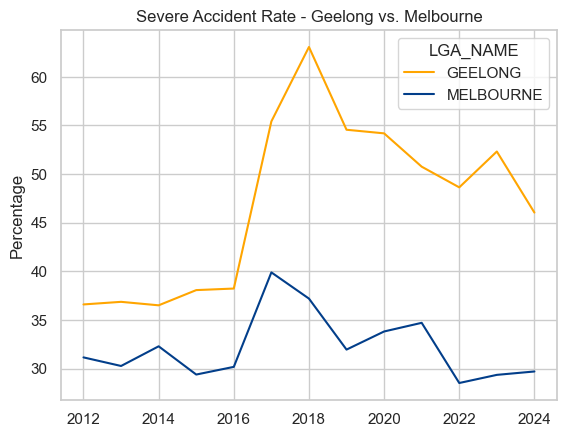

In [246]:
severe_rate = (Geelong_Melbourne_data_severe.groupby([Geelong_Melbourne_data_severe['ACCIDENT_DATE'].dt.year, Geelong_Melbourne_data_severe.LGA_NAME])['ACCIDENT_NO'].count() # Count the number of serious accidents
 / 
 geelong_melbourne_all_accidents.groupby([geelong_melbourne_all_accidents['ACCIDENT_DATE'].dt.year, geelong_melbourne_all_accidents.LGA_NAME])['ACCIDENT_NO'].count() * 100).reset_index() # Count the number of all accidents

sns.lineplot(data=severe_rate, x='ACCIDENT_DATE', y='ACCIDENT_NO', hue="LGA_NAME", palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'}) # Plot a line chart showing the severe accident rate
plt.title('Severe Accident Rate - Geelong vs. Melbourne')
plt.ylabel('Percentage')
plt.xlabel('')
plt.show()

Something changed around 2016 not only in Geelong, but also in Melbourne, leading to a peak in the serious accident rate in both cities. However, Geelong experienced a more pronounced and lasting impact.

Moreover, Geelong’s serious accident rate has consistently been higher than Melbourne’s, even in the years prior to 2016, despite having fewer total accidents. This long-standing gap raises an important question:

**What factors truly differentiate Geelong and Melbourne in terms of serious accidents?**

To explore this, we'll build a classification model aimed at identifying the key factors contributing to the higher rate of serious accidents in Geelong. These insights can guide targeted safety interventions and policy responses.

But first, we’ll consolidate all relevant tables to prepare a clean, focused dataset containing only serious accidents in Geelong and Melbourne. Let’s begin:

In [247]:
# join the three dataframes to create a new dataframe with only serious accidents in Geelong and Melbourne
df = Geelong_Melbourne_data_severe.merge(filtered_vehicles, how='inner')
df = df.merge(filtered_person, on=['ACCIDENT_NO', 'VEHICLE_ID'],how='inner')

df['VEHICLE_AGE'] = df['ACCIDENT_DATE'].dt.year - df['VEHICLE_YEAR_MANUF'] # Create a new column 'VEHICLE_AGE' in the dataframe

df = df.drop(['VEHICLE_ID', 'NO_PERSONS_INJ_3', 'NO_PERSONS_NOT_INJ', 'PERSON_ID'], axis=1) # Drop columns in the dataframe

In [248]:
df.head()

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE_DESC,DAY_WEEK_DESC,LIGHT_CONDITION,NO_OF_VEHICLES,NO_PERSONS_KILLED,NO_PERSONS_INJ_2,NO_PERSONS,...,TARE_WEIGHT,TOTAL_NO_OCCUPANTS,LAMPS,LEVEL_OF_DAMAGE,TRAFFIC_CONTROL_DESC,SEX,AGE_GROUP,HELMET_BELT_WORN,ROAD_USER_TYPE_DESC,VEHICLE_AGE
0,T20120000296,2012-01-05,1900-01-01 15:30:00,Struck Pedestrian,Thursday,1,1,0,1,2,...,3100.0,1.0,2.0,9,No control,M,Unknown,9.0,Drivers,19.0
1,T20120000338,2012-01-06,1900-01-01 04:36:00,Collision with a fixed object,Friday,3,1,0,1,5,...,1300.0,5.0,1.0,4,No control,M,30-39,1.0,Drivers,22.0
2,T20120000388,2012-01-06,1900-01-01 17:50:00,Collision with a fixed object,Friday,1,1,0,1,1,...,1512.0,1.0,2.0,5,No control,M,40-49,9.0,Drivers,13.0
3,T20120000485,2012-01-08,1900-01-01 04:20:00,Collision with vehicle,Sunday,3,2,0,1,3,...,1380.0,2.0,2.0,3,Stop-go lights,F,18-21,1.0,Drivers,5.0
4,T20120000485,2012-01-08,1900-01-01 04:20:00,Collision with vehicle,Sunday,3,2,0,1,3,...,1450.0,1.0,2.0,3,Stop-go lights,M,26-29,1.0,Drivers,8.0


The current dataframe contains **duplicate entries** for each *ACCIDENT_NO* because an accident may involve **multiple vehicles and drivers**. This reflects a **one-to-many relationship** between the **serious_accidents** table and the **filtered_person** and **filtered_vehicles** tables. As a result, each row in the dataset now represents one vehicle-driver pair per accident.

However, for our **classification model** to perform effectively, we need to eliminate these duplications. Ideally, each row should represent **a single accident**, with **aggregated information** about the vehicles and drivers involved.

To achieve this, we’ll **group the data by** *ACCIDENT_NO* and:

- Calculate the average of numerical features (e.g. VEHICLE_AGE)
- Determine the most frequent (mode) value for categorical features (e.g. AGE_GROUP)

**Example**:

Suppose an accident involves two vehicle-driver pairs with the same ACCIDENT_NO:

- Row 1: *VEHICLE_AGE = 10*, *AGE_GROUP = 20–25*
- Row 2: *VEHICLE_AGE = 20, AGE_GROUP = 20–25*

After aggregation, there should be only 1 row left representing that accident, with:

- *VEHICLE_AGE = 15*(mean)
- *AGE_GROUP = 20–25* (mode)

Let’s implement this aggregation logic now:

In [249]:
def mode_or_nan(x):
    return x.mode()[0] if not x.mode().empty else np.nan # Function to return the mode of a series or NaN if empty

df_agg = df.groupby('ACCIDENT_NO').agg({
    # Accident-level fields (mostly same across rows for same accident)
    'ACCIDENT_DATE': 'first',
    'ACCIDENT_TIME': 'first',
    'ACCIDENT_TYPE_DESC': 'first',
    'DAY_WEEK_DESC': 'first',
    'LIGHT_CONDITION': 'first',
    'ROAD_GEOMETRY_DESC': 'first',
    'SEVERITY': 'first',
    'SPEED_ZONE': 'first',
    'RMA': 'first',
    'LGA_NAME': 'first',
    'DEG_URBAN_NAME': 'first',
    'LATITUDE': 'first',
    'LONGITUDE': 'first',
    'POSTCODE_CRASH': 'first',
    'NO_PERSONS_KILLED': 'first',
    'NO_PERSONS_INJ_2': 'first',
    'NO_PERSONS': 'first',
    'NO_OF_VEHICLES': 'first',

    # Aggregated numeric values (vehicle-level)
    'VEHICLE_YEAR_MANUF': 'mean',
    'TARE_WEIGHT': 'mean',
    'TOTAL_NO_OCCUPANTS': 'mean',
    'VEHICLE_AGE': 'mean',

    # Aggregated categorical values (vehicle/person-level)
    'ROAD_SURFACE_TYPE_DESC': mode_or_nan,
    'VEHICLE_MAKE': mode_or_nan,
    'VEHICLE_TYPE_DESC': mode_or_nan,
    'LAMPS': mode_or_nan,
    'LEVEL_OF_DAMAGE': mode_or_nan,
    'TRAFFIC_CONTROL_DESC': mode_or_nan,
    'SEX': mode_or_nan,
    'AGE_GROUP': mode_or_nan,
    'HELMET_BELT_WORN': mode_or_nan,
    'ROAD_USER_TYPE_DESC': mode_or_nan
}).reset_index()


After aggregation, the dataframe now has 6202 rows. 

Let's start the model training process:

In [250]:
df_cities_comparison = df_agg.copy() # Create a copy of the aggregated dataframe for further processing

df_cities_comparison['HOUR'] = df_cities_comparison['ACCIDENT_TIME'].dt.hour # Create a new column 'HOUR' in the dataframe

In [251]:
X = df_cities_comparison.drop(['ACCIDENT_NO', 'ACCIDENT_DATE', 'ACCIDENT_TIME', 'LGA_NAME', 'LATITUDE', 'LONGITUDE', 'POSTCODE_CRASH', 'DEG_URBAN_NAME', 'VEHICLE_MAKE', 'VEHICLE_YEAR_MANUF'], axis=1) # Drop unnecessary columns for modeling

y = df_cities_comparison['LGA_NAME'].apply(lambda x: 1 if x == 'GEELONG' else 0)  # Convert LGA_NAME to binary target variable (1 for Geelong, 0 for Melbourne)

X = pd.get_dummies(X, drop_first=True) # Convert categorical variables to dummy variables

***LGA_NAME** has been converted to binary target variable (with 0 and 1 values)*

Let's see if the target variable is balanced:

In [252]:
y.value_counts() # Check the distribution of the target variable

LGA_NAME
1    3293
0    2909
Name: count, dtype: int64

The distribution of values 0 and 1 appears fairly even, indicating that the dataset is relatively balanced. This is beneficial for the classification model, as it reduces the risk of bias toward one class.

Now, we will import some of the required libraries for the machine learning model:

In [253]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Now, we will build a Random Forest classification model. The dataset will be split into two parts:

- **80% for training** the model
- **20% for testing**, to evaluate the model’s prediction accuracy

This approach helps us assess how well the model generalizes to unseen data.

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into training and testing sets

model = RandomForestClassifier(random_state=42) # Initialize the Random Forest Classifier
model.fit(X_train, y_train) # Fit the model on the training data

y_pred = model.predict(X_test) # Make predictions on the test data
accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy of the model

print(classification_report(y_test, y_pred)) # Print the classification report
print("Test Accuracy:", accuracy) # Print the accuracy of the model

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       606
           1       0.81      0.84      0.83       635

    accuracy                           0.82      1241
   macro avg       0.82      0.82      0.82      1241
weighted avg       0.82      0.82      0.82      1241

Test Accuracy: 0.8178887993553586


The model achieved an accuracy of approximately 82%, indicating it correctly classifies about 82% of the test data.

Now comes the critical part: we will analyze the feature importances derived from the Random Forest model. These importance scores help us identify **which factors contribute most to the model’s predictive performance**—in other words, which features are **most influential in differentiating serious accidents between Geelong and Melbourne**.

By examining the top-ranked features, we can gain valuable insights into the key variables that distinguish the two cities in terms of serious accident characteristics. Let’s extract and visualize these important features to better understand the underlying patterns.

In [255]:
importances = model.feature_importances_ # Get feature importances from the model
features = X.columns # Get the feature names from the dataframe

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False) # Create a DataFrame with feature importances

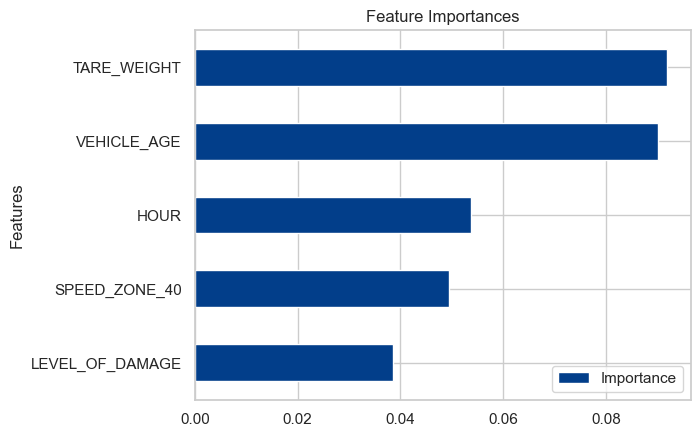

In [256]:
# plot the top 5 feature importances
feature_importance_df.sort_values(by='Importance', ascending=True).tail(5).plot.barh(x='Feature', y='Importance')
plt.title('Feature Importances')
plt.ylabel('Features')
plt.show()

Based on the Random Forest model, the top five features that most influence its predictive power are: **TARE_WEIGHT, VEHICLE_AGE, HOUR, SPEED_ZONE, and LEVEL_OF_DAMAGE.** These features stand out as the key differentiators between Geelong and Melbourne when it comes to the number of serious accidents.

Now, let’s analyze each of these features individually to understand how they contribute to the differences observed between the two cities.

*Note that we will use the original **df** dataframe instead of the aggregated one. The **df** dataframe contains duplicates*

Median tare weight in Geelong: 1424.0
Median tare weight in Melbourne: 1340.0


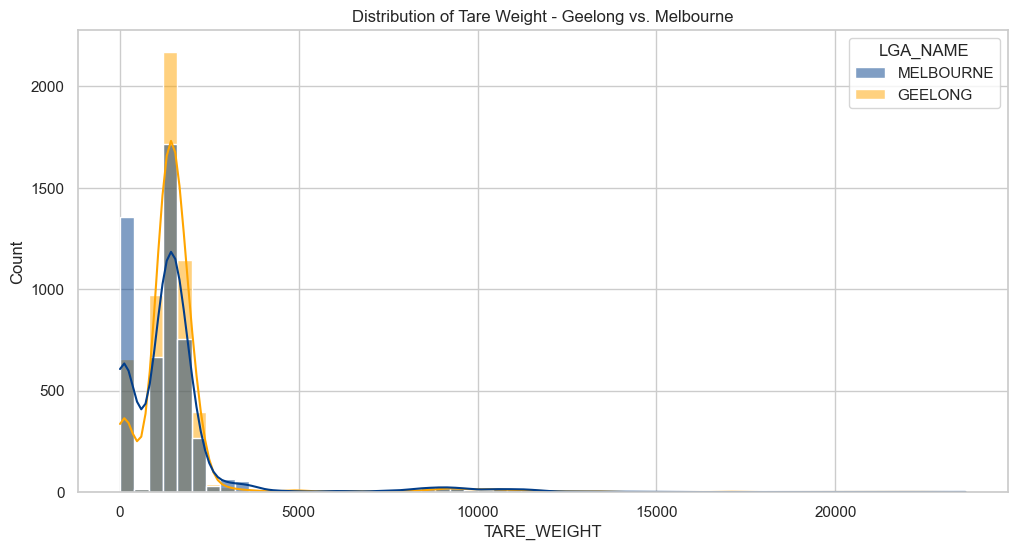

In [257]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='TARE_WEIGHT', hue='LGA_NAME', kde=True ,palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'}, binwidth= 400, common_norm=False) # Plot the distribution of TARE_WEIGHT for Geelong and Melbourne
plt.title('Distribution of Tare Weight - Geelong vs. Melbourne')

print(f'Median tare weight in Geelong: {df[df['LGA_NAME'] == 'GEELONG']['TARE_WEIGHT'].median()}')
print(f'Median tare weight in Melbourne: {df[df['LGA_NAME'] == 'MELBOURNE']['TARE_WEIGHT'].median()}')


When comparing the distribution of TARE_WEIGHT between the two cities, a clear pattern emerges: 

**vehicles involved in serious accidents in Geelong tend to be heavier than those in Melbourne**

The median vehicle weight in Geelong is approximately 1,424 kg, compared to 1,340 kg in Melbourne. This difference, though it may seem subtle, could indicate that **heavier vehicles are more frequently associated with higher accident severity** — possibly due to the greater force of impact or the types of vehicles commonly used. This insight raises important questions about road usage and vehicle type distribution in Geelong compared to Melbourne.

Now, let's see how VEHICLE_AGE is distributed across the 2 cities:

Median age of vehicle in Geelong: 10.0
Median age of vehicle in Melbourne: 7.0


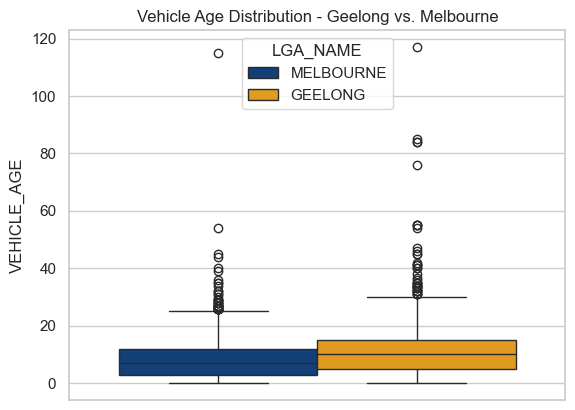

In [258]:
sns.boxplot(data=df, y='VEHICLE_AGE', hue='LGA_NAME', palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'})
plt.title('Vehicle Age Distribution - Geelong vs. Melbourne')

print(f'Median age of vehicle in Geelong: {df[df['LGA_NAME'] == 'GEELONG']['VEHICLE_AGE'].median()}')
print(f'Median age of vehicle in Melbourne: {df[df['LGA_NAME'] == 'MELBOURNE']['VEHICLE_AGE'].median()}')

A look at the vehicle age distribution reveals another key difference between Geelong and Melbourne. In serious accidents, **vehicles in Geelong tend to be older**, with a median age of 10 years, compared to just 7 years in Melbourne. This 3-year gap might seem modest at first glance, but it might reflect deeper issues such as differences in vehicle maintenance, safety features, or economic factors influencing the vehicle fleet in each city. Older vehicles may lack modern safety technologies, which could contribute to the higher severity of accidents observed in Geelong.

Although LEVEL_OF_DAMAGE has the lowest influential impact in the list of top 5 important features, it may have a strong relationship with vehicles' age, let's investigate this feature:

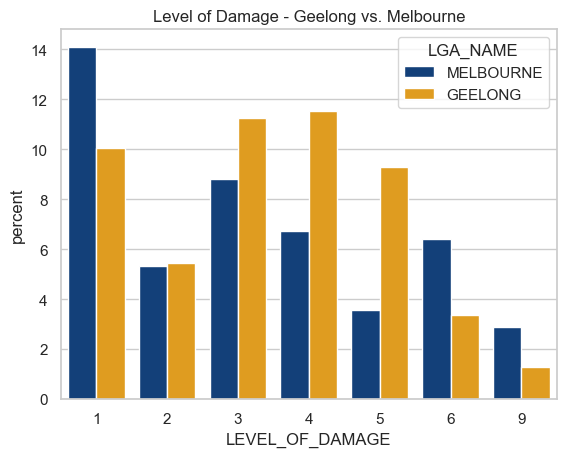

In [259]:
sns.countplot(data=df, x='LEVEL_OF_DAMAGE', hue='LGA_NAME', palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'}, stat='percent')
plt.title('Level of Damage - Geelong vs. Melbourne')
plt.show()

From the chart, we observe that Melbourne has a higher number of accidents involving vehicles with minimal damage, particularly at damage levels 1 (minor), 6 (nil), and 9 (unknown). In contrast, Geelong shows a noticeably higher count of accidents with severe vehicle damage, specifically at levels 3 to 5, which correspond to moderate, major, and unrepairable damage.

This suggests that 

**accidents in Geelong tend to be more destructive, potentially contributing to the city's higher rate of serious accidents compared to Melbourne.**

With this in mind, an important question emerges: **Could the age of the vehicle be linked to the severity of the damage in accidents?**

Let’s explore this by examining the relationship between vehicle age and level of damage.

Median vehicle age for 1 damage level: 7.0
Median vehicle age for 2 damage level: 8.0
Median vehicle age for 3 damage level: 9.0
Median vehicle age for 4 damage level: 9.0
Median vehicle age for 5 damage level: 11.0
Median vehicle age for 6 damage level: 7.0
Median vehicle age for 9 damage level: 9.0


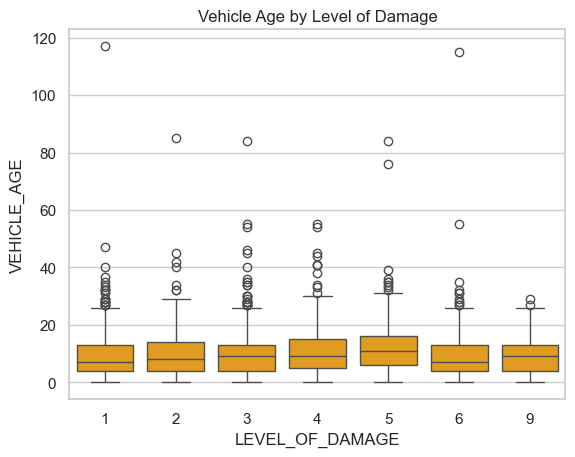

In [260]:
sns.boxplot(data=df, x='LEVEL_OF_DAMAGE', y='VEHICLE_AGE', color='orange')
plt.title('Vehicle Age by Level of Damage')

for i in df['LEVEL_OF_DAMAGE'].sort_values().unique():
    print(f"Median vehicle age for {i} damage level: {df[df['LEVEL_OF_DAMAGE'] == i]['VEHICLE_AGE'].median()}") # Print the median vehicle age for each level of damage

The chart reveals a clear trend: as the level of vehicle damage increases, so does the average vehicle age. While the difference may appear small—just one or two years—it highlights a meaningful pattern in the context of serious accidents across the two cities.

**In Geelong, serious accidents tend to involve older vehicles that also suffer from more severe damage.** 

This reinforces the idea that vehicle age may be a contributing factor to accident severity, helping explain why Geelong consistently shows a higher serious accident rate compared to Melbourne.

Now, let’s move on to the next key factor: HOUR.

Since this is an accident-level analysis, not a vehicle-level one, we need to ensure that each accident is counted only once. To do this, we’ll remove duplicate rows, so that ACCIDENT_TIME reflects just one entry per accident.

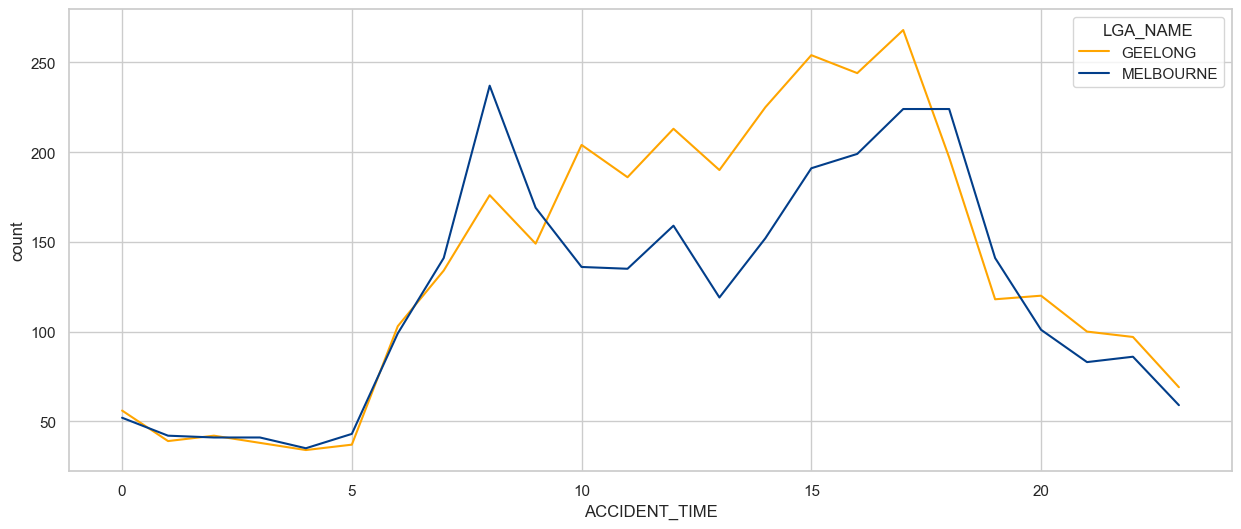

In [261]:
reduce_duplicates = df[~df['ACCIDENT_NO'].duplicated()] # Remove duplicate rows in the dataframe based on ACCIDENT_NO

hour_comparison = reduce_duplicates.groupby([reduce_duplicates['ACCIDENT_TIME'].dt.hour, 'LGA_NAME']).agg(count=('ACCIDENT_NO', 'count')).reset_index() # Group by hour and LGA_NAME, count the number of accidents

plt.figure(figsize=(15, 6))
sns.lineplot(data=hour_comparison, x='ACCIDENT_TIME', y='count', hue='LGA_NAME', palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'})

plt.show()

It's interesting to observe that 

**Melbourne records more serious accidents than Geelong during the early hours (1 a.m. to 8 a.m.), which coincides with typical commuting times to work, as well as in the early evening (around 6–7 p.m.). Geelong, on the other hand, sees a higher number of serious accidents throughout the rest of the day.**

This contrast might hint at different commuting patterns, work routines, or driving behaviors between the two cities.

One intuitive explanation could be related to headlight usage, as the time of day and whether a vehicle’s headlights (LAMPS) are turned on are likely correlated. Let's test this hypothesis:

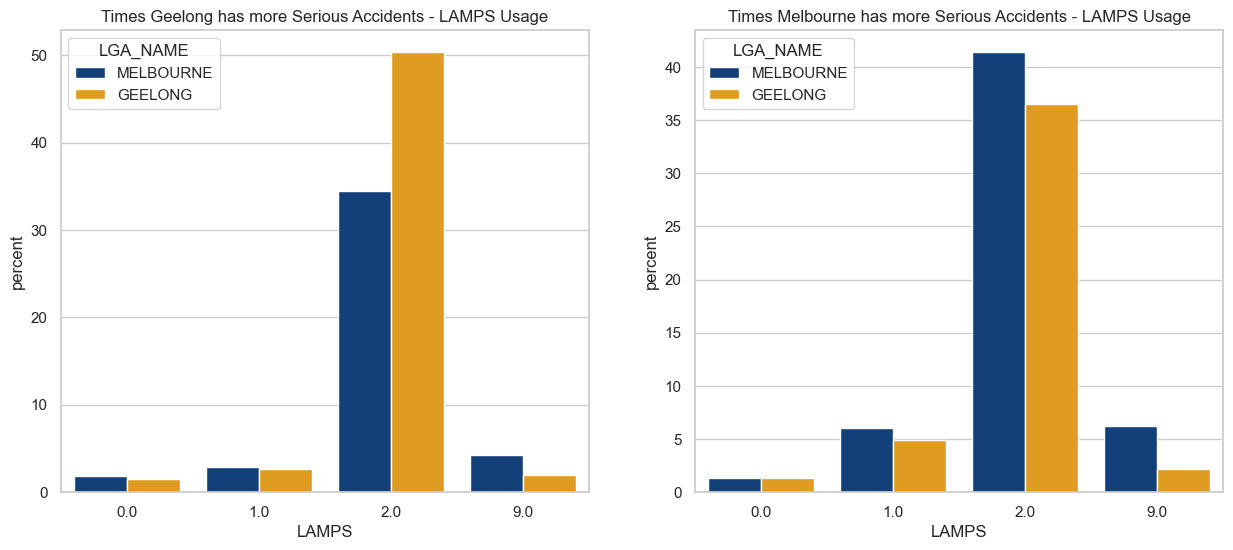

In [262]:
geelong_accident_hours = df[((df.ACCIDENT_TIME.dt.hour >= 10) & (df.ACCIDENT_TIME.dt.hour <= 17)) | (df.ACCIDENT_TIME.dt.hour >= 20)] # Filter the dataframe to keep accidents that happened between 1 PM and 6 PM
melbourne_accident_hour = df[~df['ACCIDENT_NO'].isin(geelong_accident_hours['ACCIDENT_NO'])] # Filter the dataframe to keep accidents that happened between 6 AM and 12 PM

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=geelong_accident_hours, x='LAMPS', hue='LGA_NAME', palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'}, stat='percent')
plt.title('Times Geelong has more Serious Accidents - LAMPS Usage')

plt.subplot(1, 2, 2)
sns.countplot(data=melbourne_accident_hour, x='LAMPS', hue='LGA_NAME', palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'}, stat='percent')
plt.title('Times Melbourne has more Serious Accidents - LAMPS Usage')

plt.show()

The chart reveals a critical insight:

**A large proportion of serious accidents occur when headlights (LAMPS) are not turned on (LAMPS = 2).**

Notably, during the hours when **Geelong experiences more serious accidents (between 10 a.m. to 5 p.m. and at night)**, a greater number of vehicles in Geelong were involved in crashes **without their headlights on**, compared to Melbourne.

Conversely, during the **early morning and evening hours**—when **Melbourne records more serious accidents**—more Melbourne vehicles were found without headlights on than those in Geelong.

This consistent pattern across different time frames suggests that 

**headlight usage—or the lack of it—could be a contributing factor to accident severity. Regardless of the city, hours with a higher number of vehicles not using headlights tend to coincide with more serious accidents, highlighting a potential link between visibility and crash severity.** 
    
It emphasizes the potential role of driver visibility and behavior in shaping accident outcomes.

Now, let's analyse the last feature: SPEED_ZONE with **reduced_duplicates** dataframe:

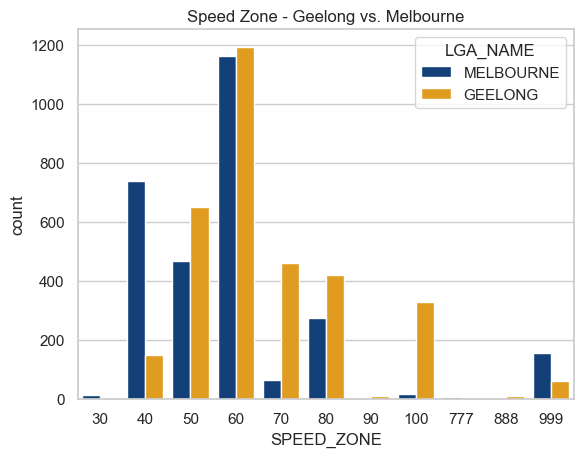

In [263]:
sns.countplot(data=reduce_duplicates, x='SPEED_ZONE', hue='LGA_NAME', palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'}) # Plot the count of accidents by SPEED_ZONE for Geelong and Melbourne
plt.title('Speed Zone - Geelong vs. Melbourne')
plt.show()

The chart clearly shows that most serious accidents in Melbourne occur in lower-speed zones, whereas Geelong sees more serious accidents in higher-speed areas.

As speed zones increase, the gap in the number of serious accidents between the two cities widens, with Geelong consistently recording more cases.

This pattern suggests that **speed zones are a significant differentiator in the severity of accidents between Melbourne and Geelong**, highlighting the potential impact of road design, enforcement, and driving behavior in high-speed environments.

# V. Conclusion

While Melbourne records more total accidents, **Geelong has a much higher rate of serious ones**—a trend that’s grown since 2016. This sparked a deeper investigation: *What makes accidents in Geelong more severe?*

A classification model pointed to five key factors:

- **Tare Weight**: Vehicles in Geelong are heavier (median: 1424kg vs. 1340kg), which may increase accident severity.

- **Vehicle Age**: Geelong’s cars are older (median age: 10 vs. 7), possibly lacking newer safety features.

- **Level of Damage**: Geelong sees more major or unrepairable damage, while Melbourne has more minor ones.

- **Time of Day**: Melbourne’s serious accidents cluster during commutes, while Geelong’s happen more midday and late at night—with hours where high number of vehicles not using headlights causing more accidents in both cities. 

- **Speed Zones**: Geelong’s serious crashes occur more often in high-speed areas, unlike Melbourne’s, which cluster in slower zones.

These patterns suggest that **Geelong’s severe accidents stem from a mix of vehicle conditions, road speeds, and driving behaviors.**

By addressing these risk factors, especially around vehicle safety and driver habits, **Geelong could significantly reduce the severity of its road accidents.**

Certain approaches can be done by the authorities to help ease the problem:

- Enforce safer driving practices and headlight usage, especially during high-risk hours, through targeted policies and public awareness campaigns.
- Invest in vehicle safety and speed control, including incentives for upgrading older cars and stricter speed management in high-risk areas like Geelong, such  as implementing speed-calming measures, increase signage, and prioritize infrastructure improvements to reduce crash impact.